## 1. Business Understanding

This dataset highlights recent data science and data science-related positions around the world. The data was collected from Kaggle, and the dataset itself was sourced from position postings from aijobs.net from 2020-2023. This data can be extremely useful in business applications for both employers and employees. It provides valuable insights into competitive market pay for data science-related positions. In a capitalist environment, especially the United States, where a majority of the positions in this dataset are located, payroll and salaries are almost always the top line expense. Successful companies will need to have a handle on their payroll expenses, and this dataset can help in this regard. It also represents some of the most highly compensated employees at companies, and can be used to optimize data science team compensation and position structure. From a personal perspective, this dataset can also be used to aid employees in understanding their current career value and predicting their future salary expectations, giving them knowledge and tools to achieve the maximum compensation.
<br>
<br>
The dataset aims to predict salaries (in USD) for data science-related job positions and enables companies to perform time series analysis to forecast salary statistics. This helps in strategic budgeting and planning for more efficient payroll management. Data scientists and machine learning engineers can also utilize this data to predict their potential compensation. Since they are the ones designing and implementing such algorithms, it's beneficial for them to make use of this data for career planning and good data science practice. Additionally, this dataset can be employed in time-series prediction to forecast future salary amounts using a model trained on historical data. When a machine learning algorithm is used for prediction, it can capture non-linear trends that might be overlooked in a typical statistical analysis.
<br>
<br>
In order to assess the accuracy and performance of machine learning algorithms, it's essential to establish a baseline for comparison. When dealing with a continuous predicted/target variable, a good measure of success is the mean or median baseline model. This means using the mean or median of the distribution as the predicted value. This approach is preferred due to its simplicity, usability as a basic benchmark for the dataset, and the ability to be evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [14]:
import pandas as pd
import warnings

pd.set_option('display.max_columns',None)

salary_column = pd.read_csv('lab_ds_salaries.csv')
salary_column = salary_column['salary_in_usd']
# mean and median
mean_value = salary_column.mean()
median_value = salary_column.median()
print(f"Mean Value: {mean_value}")
print(f"Median Value: {median_value}","\n")


# evaluation metrics (mean-based)(done without pandas for formula understanding)
mae_mean = sum(abs(s - mean_value) for s in salary_column)\
                 / len(salary_column)
mse_mean = sum((s - mean_value) ** 2 for s in salary_column)\
                 / len(salary_column)
rmse_mean = mse_mean ** 0.5
print(f"Mean-Based Predictor - MAE: {mae_mean}, MSE: {mse_mean}, RMSE: {rmse_mean}")

#  evaluation metrics (median-based) (done without pandas \
# for formula understanding)
mae_median = sum(abs(s - median_value) for s in salary_column)\
                 / len(salary_column)
mse_median = sum((s - median_value) ** 2 for s in salary_column)\
                 / len(salary_column)
rmse_median = mse_median ** 0.5
print(f"Median-Based Predictor - MAE: {mae_median}, MSE: {mse_median}, RMSE: {rmse_median}")

Mean Value: 137570.38988015978
Median Value: 135000.0 

Mean-Based Predictor - MAE: 49099.12149432303, MSE: 3974953021.204049, RMSE: 63047.22849740541
Median-Based Predictor - MAE: 49015.545139813585, MSE: 3981559925.34008, RMSE: 63099.60321063897


Based on the results, we observed that the median-based predictor has a slightly lower MAE, suggesting that the median salary is, on average, closer to the actual salaries. The MSE is slightly lower in the mean-based model compared to the median-based model, indicating a slight performance improvement in handling larger errors. The RMSE has similar results to the MSE, with the difference being even smaller. Overall, both base models perform roughly equivalently. In the case of this lab, since there has been no completion of any visualization and assumptions have been made about normality (normal distribution being better for mean-based models), and since the models perform relatively equally, it would be best to proceed with the median-based model. This model works with skewed distributions, is robust to outliers, and represents the central tendency of the salary data.
<br>
<br>
Alternatively, a more complex baseline model that can be compared with a machine learning algorithm is a simple linear or multilinear regression model (not completed in this notebook). While statistical assumptions such as normality, equal variance, linearity, and independence must be met to use this model, linear regression is a simple predictive model that represents a linear function of the independent variables (predictors). Therefore, in addition to being a baseline model, it allows the data analyst to draw statistical conclusions and potential inferences about the predictions. This knowledge can be valuable for feature engineering and the development of machine learning models, paving the way for potential improvements to the model based on insights gained from linear regression.

## 2. Data Understanding

### 2.1 Data Loading

#### Dependencies:
\# !pip install pandas\
\# !pip install numpy\
\# !pip install scikit-learn\
\# !pip install seaborn\
\# !pip install matplotlib\
\# !pip install networkx\
\# !pip install scipy\
\# !pip install wordcloud\
\# !pip install umap

In [15]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

df = pd.read_csv('lab_ds_salaries.csv') # read in the csv file
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [16]:
print(df.dtypes)
print('===========')
print(df.info())
print('===========')
# note that the describe function defaults to using only some variables
df.describe()

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 no

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [17]:
# create a data description table
data_des = pd.DataFrame()

#code adapted from sample Lab 1 submission
data_des['Features'] = df.columns
data_des['Description'] = ['Work Year', 'Position Experience Level',
                          'Employment Type', 'Job Title',
                          'Position Salary', 'Currency of Salary',
                          'Position Salary (USD)', 'Employee Residence',
                          'Percentage of Job Responsibilities Completed Remotely', 'Company Location', 'Company Size']
data_des['Scales'] = ['interval'] + ['ordinal'] + ['nominal']*2 + ['ratio'] + ['nominal']+ ['ratio'] + ['nominal'] + ['ratio'] + ['nominal'] + ['ordinal']
data_des['Discrete\Continuous'] = ['continuous'] + ['discrete']*3 + ['continuous'] + \
                                  ['discrete'] + ['continuous'] + ['discrete'] + ['continuous'] + ['discrete']*2
data_des['Unique Values'] = df[df.columns].nunique().values

data_des

Features                                        Description  \
0            work_year                                          Work Year   
1     experience_level                          Position Experience Level   
2      employment_type                                    Employment Type   
3            job_title                                          Job Title   
4               salary                                    Position Salary   
5      salary_currency                                 Currency of Salary   
6        salary_in_usd                              Position Salary (USD)   
7   employee_residence                                 Employee Residence   
8         remote_ratio  Percentage of Job Responsibilities Completed R...   
9     company_location                                   Company Location   
10        company_size                                       Company Size   

      Scales Discrete\Continuous  Unique Values  
0   interval          continuous              4  
1    ordinal            discrete              4  
2    nominal            discrete              4  
3    nominal            discrete             93  
4      ratio          continuous            815  
5    nominal            discrete             20  
6      ratio          continuous           1035  
7    nominal            discrete             78  
8      ratio          continuous              3  
9    nominal            discrete             72  
10   ordinal            discrete              3

The dataset contains 12 columns of features, with 4 being integer types and the rest being object types.

The integer-type features 'work_year' and 'salary_usd' are suitable for visualization and analysis. They represent the year of the salary for a position and the salary in USD currency. The 'salary_in_usd' is considered the feature to be predicted since its values are in the same scale (United States Dollar).

The 'remote_ratio' is a unique integer-type feature in our dataset. It indicates the percentage of time/work the position will be remote. However, it only has 3 unique values, representing whether the job is not-remote (0), part-time remote (50), and fully remote (100). Due to this distinct nature, it behaves more like a categorical/factor variable with 3 levels. It would be better to convert this feature into a categorical representation by binning the ratios to reduce the potential values of the data.

(Grammarly AI; Use: Essay Edit Critiquing)

In [18]:
### Binning Variables for Data Preprocessing
# bins and labels
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '26-50%', '51-75%', '76-100%']
df['remote_ratio_bin'] = pd.cut(df['remote_ratio'], bins=bins, labels=labels, include_lowest=True)

### Dummy Variables for Visualization
remote_df = pd.get_dummies(df['remote_ratio'], prefix='remote_ratio', dtype=float)
df = pd.concat([df, remote_df], axis = 1)
print(df[:-5].head())


   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size remote_ratio_bin  remote_ratio_0  \
0               ES

### 2.2 Data Quality Verification

This dataset contains various features of object types describing company size and location, employee location, position experience level, and employment type (part-time, full-time, etc.). All the data are categorical, with text representing the actual values. There are only so many levels per feature except for the country location codes. However, most positions in this dataset are US-based, so any random data selection will mainly reflect the Data Science job market in the US. Any manipulation of this categorical data beyond its current state should be transformed using one-hot encoding.

In [19]:
#get the number of unique values per column
cols_of_interest = ['company_size','company_location', 'employee_residence','experience_level','employment_type']
unique_counts = df[cols_of_interest].nunique()

print(unique_counts,"\n")
print(df.company_location.value_counts().head(10))
print(df.employee_residence.value_counts().head(10))

#ordinal varibles
company_size = ['S', 'M', 'L']
experience_level = ['EN', 'MI', 'SE', 'EX']

# Convert to ordinal (for use later with UMAP Assumptions)
df['company_size_2'] = pd.Categorical(df['company_size'], categories=company_size, ordered=True)
df['experience_level_2'] = pd.Categorical(df['experience_level'], categories=experience_level, ordered=True)

company_size           3
company_location      72
employee_residence    78
experience_level       4
employment_type        4
dtype: int64 

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: count, dtype: int64
employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
DE      48
FR      38
PT      18
BR      18
GR      16
Name: count, dtype: int64


The feature of object type, 'job_title', presents a more challenging problem...

In [20]:
pd.set_option('display.max_rows', 92)
print("Number of Unique Job Titles: ", df.job_title.nunique())

val_counts = df.job_title.value_counts()
print(val_counts.head(20))

Number of Unique Job Titles:  93
job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Computer Vision Engineer        18
AI Scientist                    16
BI Data Analyst                 15
Business Data Analyst           15
Data Specialist                 14
Name: count, dtype: int64


 There are 93 unique values for this feature, and the two most common positions (values) are "Data Engineer" and "Data Scientist." Upon closer examination, it is apparent that there are redundancies or duplicates in the titles, which vary only slightly in their spelling but can be assumed to represent the same position or a derivativation/specialization of it. For instance, from the unique count's chart below, we can observe that "Machine Learning Engineer," the 4th most common job title, has alternate spelling values, such as "ML Engineer." Furthermore, the third most common job title, "Data Analyst", includes various derivative positions in this dataset ("BI Data Analyst", "Business Data Analyst", etc.)

To enhance the representation of relationships in the visualizations, regular expressions will be used to condense the levels of 'job_title.' For the purpose of analysis, the filtering will be limited to the 6 most common job titles, while leaving other variables unchanged. The updated values will be stored in the feature 'job_title_2'.

In [21]:
import re

# Get the top six common job titles
top_six = val_counts.iloc[0:6]
common_jobs = [x for x in top_six.index] #get job anmes from series

# Create a regex pattern to match any of the top six job titles
re_pattern = r'|'.join([fr"(?:{x})" for x in common_jobs])
print("Top six job titles:", common_jobs)
print("Regex pattern:", re_pattern, "\n")

# Find all matches of the regex pattern in the job_title column
matches = df.job_title.str.findall(re_pattern)

# Create a new column, setting the matched job title or the original if no match
df['job_title_2'] = [match[0] if match else job_title for match, job_title in zip(matches, df['job_title'])]
df['job_title_3'] = [match[0] if match else "Other" for match in matches] #for visualization later
# Print the number of unique job titles in the new column
print("Number of Unique Job Titles: ", df['job_title_2'].nunique())

# Display the counts of the top 25 job titles in the new column
df['job_title_2'].value_counts().head(25)

Top six job titles: ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect']
Regex pattern: (?:Data Engineer)|(?:Data Scientist)|(?:Data Analyst)|(?:Machine Learning Engineer)|(?:Analytics Engineer)|(?:Data Architect) 

Number of Unique Job Titles:  62


job_title_2
Data Engineer                               1067
Data Scientist                               871
Data Analyst                                 662
Machine Learning Engineer                    295
Analytics Engineer                           109
Data Architect                               105
Research Scientist                            82
Applied Scientist                             58
Data Science Manager                          58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
Data Specialist                               14
BI Developer                                  13
Applied Machine Learning Scientist            12
AI Devel

Refining the grouping of the Job title data reduced the count of unique values by roughly a third, and the top six positions have greater concentrations relative to the original dataset. This will prove beneficial in the subsequent visualization models.

#### 2.21 NaN/Missing Values

<Figure size 640x480 with 0 Axes>

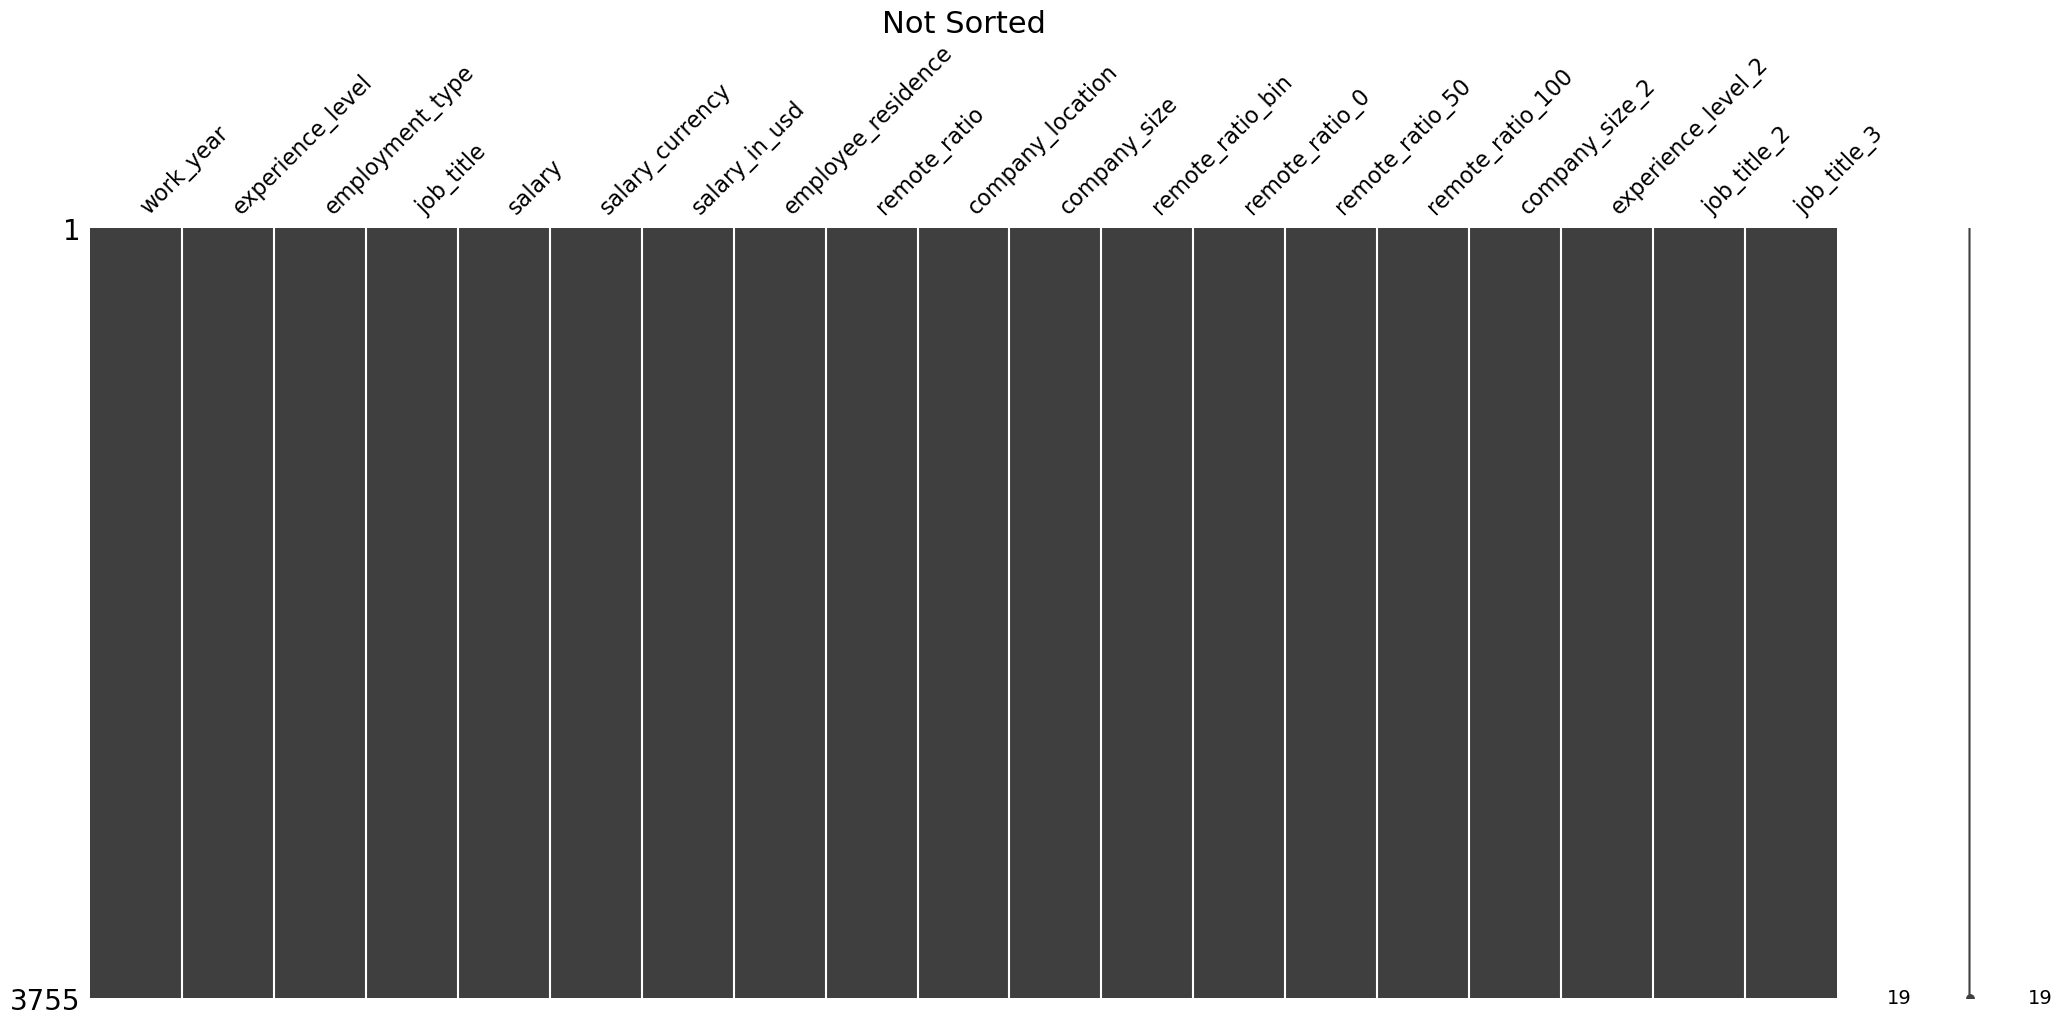

<Figure size 640x480 with 0 Axes>

In [22]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# External package: conda install missingno
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22) #Filter Bar

plt.figure()
# mn.matrix(df.sort_values(by=["Cabin","Age"]))
# plt.title("Sorted",fontsize=22)
# plt.show()

Using the filter bar visualization above, one can visualize the distribution of NA/Missing values across the dataset (in index order). Based on the graph, there are no missing values. This can also be confirmed when using the .info() statement on the data frame (2.2 Data Loading), where it is observed the count of non-null objects within each of the 11 features is equal to the number of rows in the data frame, 3755.

#### 2.22 Duplicate Data

Many duplicate entries (1,171 out of 3,755 total entries) were detected in the dataset. Given the dataset's context and data science professionals' salaries, it is plausible that some duplicates are legitimate. For example, multiple individuals might hold the same position at the same location, earning a similar salary, especially in larger companies or common roles.

In [23]:
#Check for Duplicates
duplicates = df.duplicated()
df[duplicates]

work_year experience_level employment_type           job_title  salary  \
115        2023               SE              FT      Data Scientist  150000   
123        2023               SE              FT  Analytics Engineer  289800   
153        2023               MI              FT       Data Engineer  100000   
154        2023               MI              FT       Data Engineer   70000   
160        2023               SE              FT       Data Engineer  115000   
...         ...              ...             ...                 ...     ...   
3439       2022               MI              FT      Data Scientist   78000   
3440       2022               SE              FT       Data Engineer  135000   
3441       2022               SE              FT       Data Engineer  115000   
3586       2021               MI              FT       Data Engineer  200000   
3709       2021               MI              FT      Data Scientist   76760   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
115              USD         150000                 US             0   
123              USD         289800                 US             0   
153              USD         100000                 US           100   
154              USD          70000                 US           100   
160              USD         115000                 US             0   
...              ...            ...                ...           ...   
3439             USD          78000                 US           100   
3440             USD         135000                 US           100   
3441             USD         115000                 US           100   
3586             USD         200000                 US           100   
3709             EUR          90734                 DE            50   

     company_location company_size remote_ratio_bin  remote_ratio_0  \
115                US            M            0-25%             1.0   
123                US            M            0-25%             1.0   
153                US            M          76-100%             0.0   
154                US            M          76-100%             0.0   
160                US            M            0-25%             1.0   
...               ...          ...              ...             ...   
3439               US            M          76-100%             0.0   
3440               US            M          76-100%             0.0   
3441               US            M          76-100%             0.0   
3586               US            L          76-100%             0.0   
3709               DE            L           26-50%             0.0   

      remote_ratio_50  remote_ratio_100 company_size_2 experience_level_2  \
115               0.0               0.0              M                 SE   
123               0.0               0.0              M                 SE   
153               0.0               1.0              M                 MI   
154               0.0               1.0              M                 MI   
160               0.0               0.0              M                 SE   
...               ...               ...            ...                ...   
3439              0.0               1.0              M                 MI   
3440              0.0               1.0              M                 SE   
3441              0.0               1.0              M                 SE   
3586              0.0               1.0              L                 MI   
3709              1.0               0.0              L                 MI   

             job_title_2         job_title_3  
115       Data Scientist      Data Scientist  
123   Analytics Engineer  Analytics Engineer  
153        Data Engineer       Data Engineer  
154        Data Engineer       Data Engineer  
160        Data Engineer       Data Engineer  
...                  ...                 ...  
3439      Data Scientist      Data Scientist  
3440       Data Engineer  

##### Handling of Duplicate Data
Given the nature of the dataset and the potential legitimacy of some duplicates, it is not advisable to blindly remove all duplicates. Instead, a more nuanced approach should be taken:
- Consider Context and Use Case: Depending on the analysis or prediction task, consider whether having duplicates might skew the results or provide a more realistic training set for models.
- Examine Duplicates Closely: Check if duplicates are exact across all columns or only specific fields. This can provide insights into whether duplicates are errors or valid entries.

##### Justification for Keeping Some Duplicates:
In cases where the duplicates are legitimate (e.g., common roles in large companies), removing them could lead to the loss of valuable data that accurately represents the salary distribution in the field. If analysis or predictive modeling is intended, consider the impact of duplicates on your specific use case and document the decision thoroughly.


##### Partial Duplicates:
Partial duplicates can indicate common patterns or anomalies in large datasets, especially those involving human-related data like jobs and salaries. For instance, if many entries have the same job title, salary, and company location but differ slightly in other aspects, it might highlight standard industry practices or common errors in data entry.
Deciding whether to keep partial duplicates will significantly impact our specific analysis goals. For example, suppose you're analyzing salary distributions across different regions. In that case, you might want to keep entries that differ only in the employee's residence but are otherwise identical, as they provide valid and crucial data points for different geographical areas.


In [24]:
# Define key columns for identifying potential duplicates
key_columns = ['job_title_2', 'salary_in_usd', 'company_location']

# Check for duplicates based on these key columns
key_duplicates = df.duplicated(subset=key_columns, keep=False)

# Display the duplicated rows based on key columns to examine them
print(df[key_duplicates].sort_values(by=key_columns).head(10))


      work_year experience_level employment_type           job_title  salary  \
3536       2021               EN              PT        AI Scientist   12000   
3735       2021               EN              PT        AI Scientist   12000   
2916       2022               EX              FT        AI Scientist  200000   
3126       2022               MI              FT        AI Scientist  200000   
3155       2022               MI              FT        AI Scientist  200000   
2920       2022               SE              FT  Analytics Engineer   63000   
2945       2022               SE              FT  Analytics Engineer   63000   
1963       2022               MI              FT  Analytics Engineer  100000   
2831       2022               SE              FT  Analytics Engineer  100000   
2219       2022               SE              FT  Analytics Engineer  110000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
3536             USD          12000            

In [25]:
# Remove duplicates
data_cleaned = df.drop_duplicates()

# Verify the number of entries after removing duplicates
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           2584 non-null   int64   
 1   experience_level    2584 non-null   object  
 2   employment_type     2584 non-null   object  
 3   job_title           2584 non-null   object  
 4   salary              2584 non-null   int64   
 5   salary_currency     2584 non-null   object  
 6   salary_in_usd       2584 non-null   int64   
 7   employee_residence  2584 non-null   object  
 8   remote_ratio        2584 non-null   int64   
 9   company_location    2584 non-null   object  
 10  company_size        2584 non-null   object  
 11  remote_ratio_bin    2584 non-null   category
 12  remote_ratio_0      2584 non-null   float64 
 13  remote_ratio_50     2584 non-null   float64 
 14  remote_ratio_100    2584 non-null   float64 
 15  company_size_2      2584 non-null   categor

## 3. Data Visualization
Visualizing Basic Distributions of Features
We'll concentrate on the following characteristics:

- 3.A.1: Salary in USD (numerical) (Histogram and KDE),
- 3.A.2: experience level (categorical) (Boxplot),
- 3.A.3: remote ratio (numerical) (Correlation plot),
- 3.A.4: firm size (categorical) (Correlation plot),
- 3.A.5: job title (categorical) (Barplot).

### Visualization in Python with Pandas, Matplotlib

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

### 3.A.1: Salary Distribution (USD)


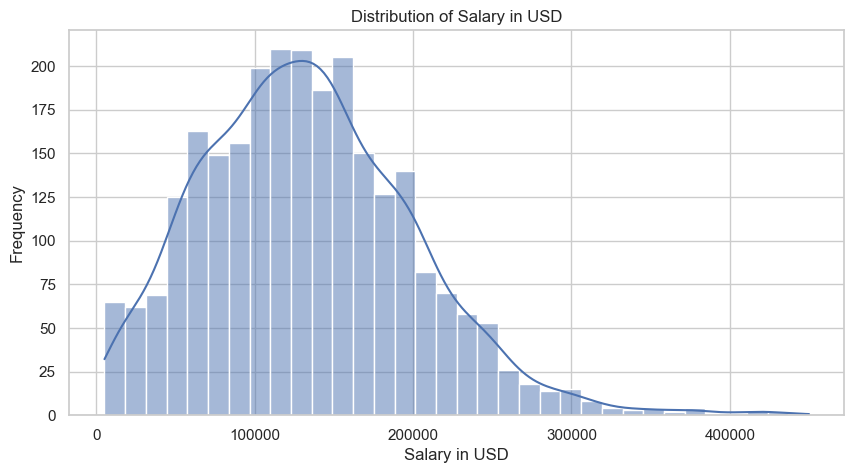

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")


sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['salary_in_usd'], kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

 The "Distribution of Salary in USD" figure illustrates how salaries are distributed. The majority of earnings are on the low end, with only a few high salaries. The KDE (Kernel Density Estimation) line, a smooth curve, represents the general form of the income distribution. This suggests that there are many people with lesser earnings and only a few with really high salaries.

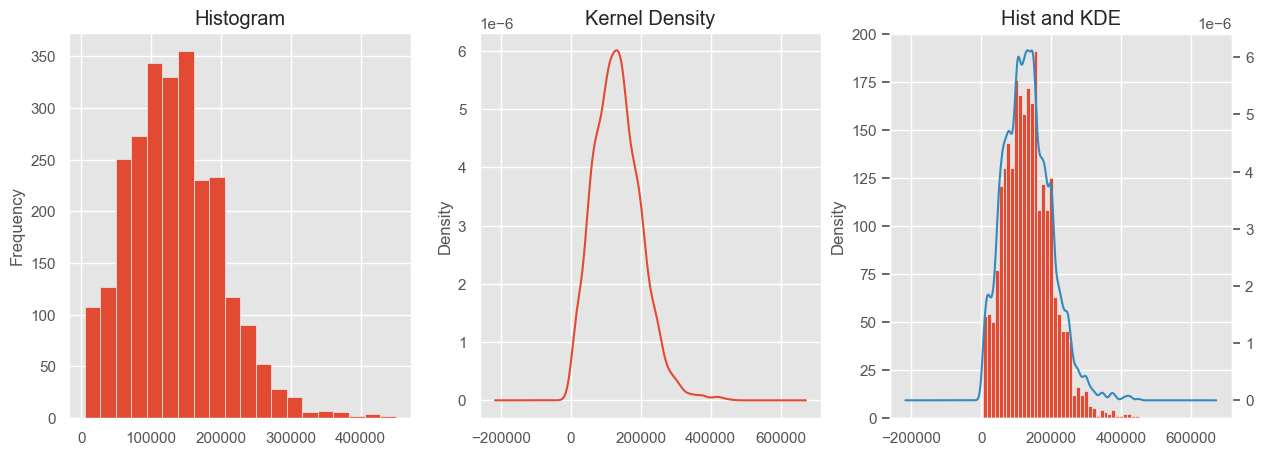

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
data_cleaned['salary_in_usd'].plot.hist(bins=20)
plt.title('Histogram')

plt.subplot(1, 3, 2)
data_cleaned['salary_in_usd'].plot.kde(bw_method=0.2)
plt.title('Kernel Density')

plt.subplot(1, 3, 3)
data_cleaned['salary_in_usd'].plot.hist(bins=40)
data_cleaned['salary_in_usd'].plot.kde(bw_method=0.1, secondary_y=True)
plt.title('Hist and KDE')

plt.show()

These graphs show that the majority of data science professionals receive wages in the low to mid-range, with a notable decrease in the proportion of persons earning very high salaries. The histogram shows that most wages range between 50,000 and 200,000 USD, with fewer people earning more than 200,000 USD. The Kernel Density Estimation (KDE) graphic smoothes out the income data to reveal the general shape of the distribution. This combined figure emphasizes the right-skewed aspect of the income distribution, demonstrating that while many people earn between 50,000 and 200,000 USD, a smaller percentage receive greater wages. Employers may use this information to better understand typical wage bands and make educated compensation decisions. It may also help job seekers create reasonable compensation expectations based on industry standards.

## 3.A.2: Boxplot of Experience Level

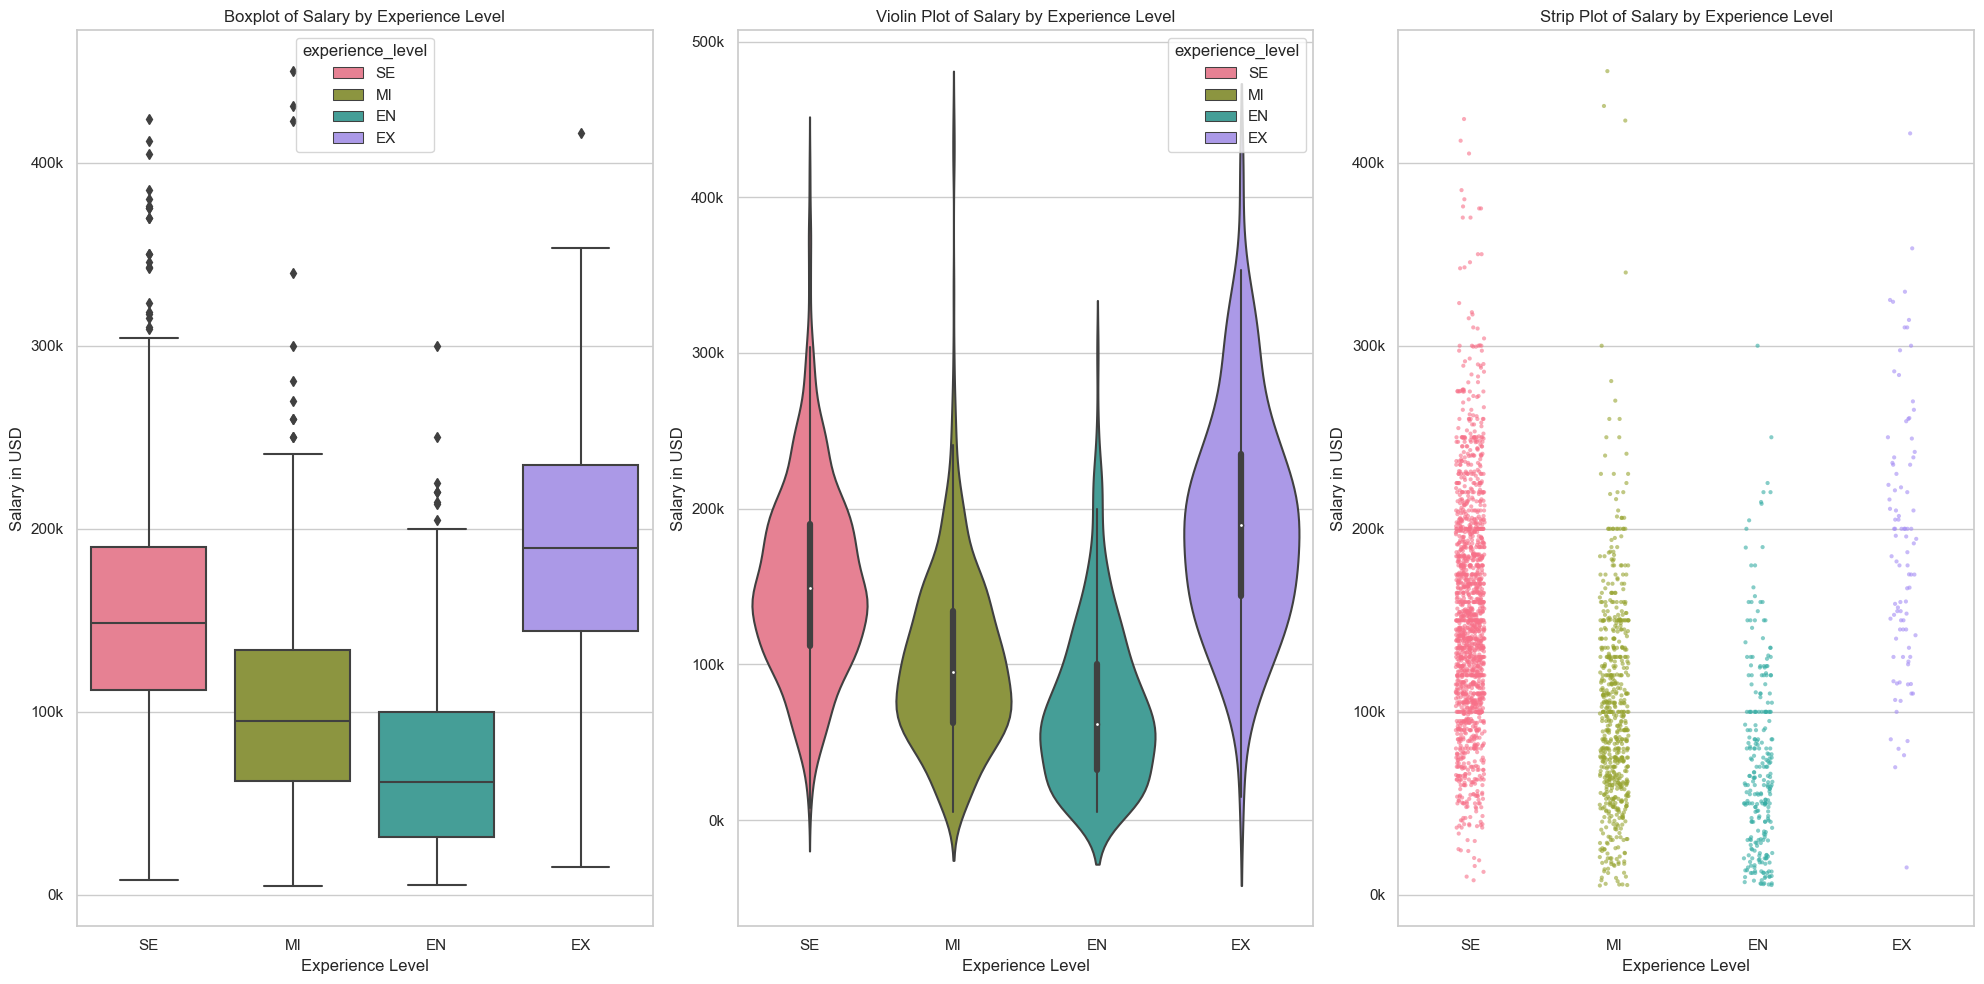

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

def salary_formatter(x, pos):
    return '%1.0fk' % (x * 1e-3)

unique_experience_levels = data_cleaned['experience_level'].nunique()
palette = sns.color_palette("husl", unique_experience_levels)

plt.subplot(1, 3, 1)
sns.boxplot(x="experience_level", y="salary_in_usd", data=data_cleaned, palette=palette, hue="experience_level", dodge=False)
plt.title('Boxplot of Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(salary_formatter))


plt.subplot(1, 3, 2)
sns.violinplot(x="experience_level", y="salary_in_usd", data=data_cleaned, palette=palette, hue="experience_level", dodge=False, legend=False)
plt.title('Violin Plot of Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(salary_formatter))


plt.subplot(1, 3, 3)
sns.stripplot(x="experience_level", y="salary_in_usd", data=data_cleaned, size=3, palette=palette, alpha=0.6, hue="experience_level", dodge=False, legend=False) # size controls marker size
plt.title('Strip Plot of Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(salary_formatter))

plt.tight_layout()
plt.show()


These customizable visualizations give a sharper and more thorough picture of how earnings change with experience level, providing significant insights on salary structures.

In box plot The median wage is shown by the line within each box. The box represents the interquartile range (IQR), whereas the whiskers extend up to 1.5 times the IQR. Outliers are represented as individual points. Higher degrees of experience tend to result in higher median pay. There is considerable variation within each experience level, with certain outliers suggesting very high or low pay.

The violin plot is similar to the boxplot, but it contains a kernel density estimation that depicts the distribution shape for each experience level. The width of each violin shows the distribution of earnings across different levels. This helps to understand the distribution and concentration of pay for each experience level.

The strip plot displays separate wage data points for each experience level, giving a more detailed perspective of the distribution without the overlapping problem. Each dot represents a single pay data point, and the dispersion of dots depicts the range of incomes within each experience level.

## 3.A.3: The Feature Correlation Plot

Heatmap visualizes the relationships between different features in the dataset. Each cell in the heatmap shows the correlation coefficient between two features, ranging from -1 to 1.

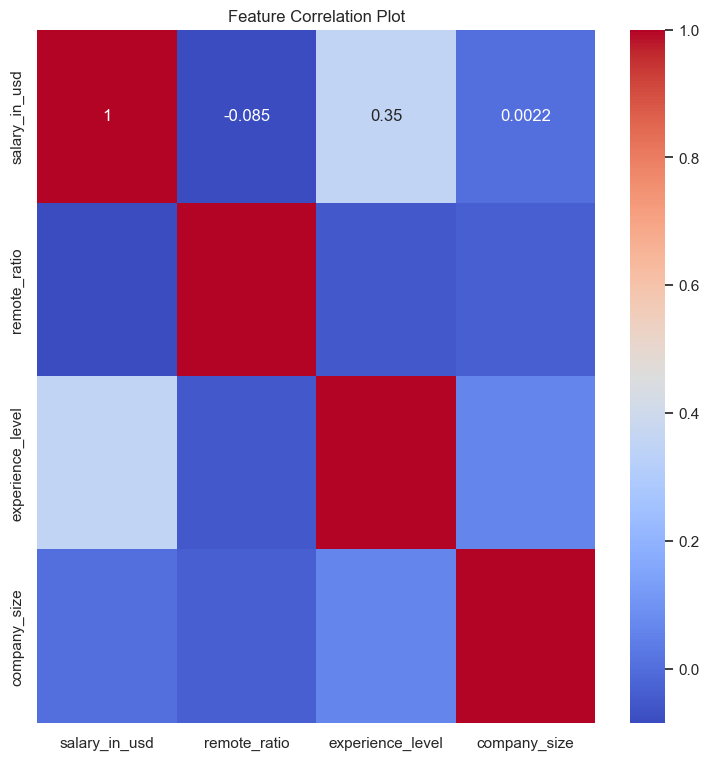

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_cleaned_copy = data_cleaned.copy()
data_cleaned_copy['experience_level'] = data_cleaned_copy['experience_level'].astype('category').cat.codes
data_cleaned_copy['company_size'] = data_cleaned_copy['company_size'].astype('category').cat.codes

vars_to_use = ['salary_in_usd', 'remote_ratio', 'experience_level', 'company_size']

correlation_matrix = data_cleaned_copy[vars_to_use].corr()

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, ax=ax)

plt.yticks(ticks=np.arange(0.5, len(vars_to_use), 1), labels=vars_to_use)
plt.xticks(ticks=np.arange(0.5, len(vars_to_use), 1), labels=vars_to_use)
plt.title('Feature Correlation Plot')
plt.show()

The heatmap's strongest association is a moderate positive correlation (0.35) between salary and amount of experience. This suggests that experience level is an important factor in deciding salary. Employers should consider experience level when determining compensation to ensure they are competitive and equitable. Other connections in the heatmap are minor, demonstrating that the remote ratio and firm size have no substantial links with wage or experience level in this dataset. While remote work restrictions and firm size are essential concerns, they have little impact on wage levels.



## 3.A.4: Grouped Count Plots [Experience level (categorical) vs Salary]

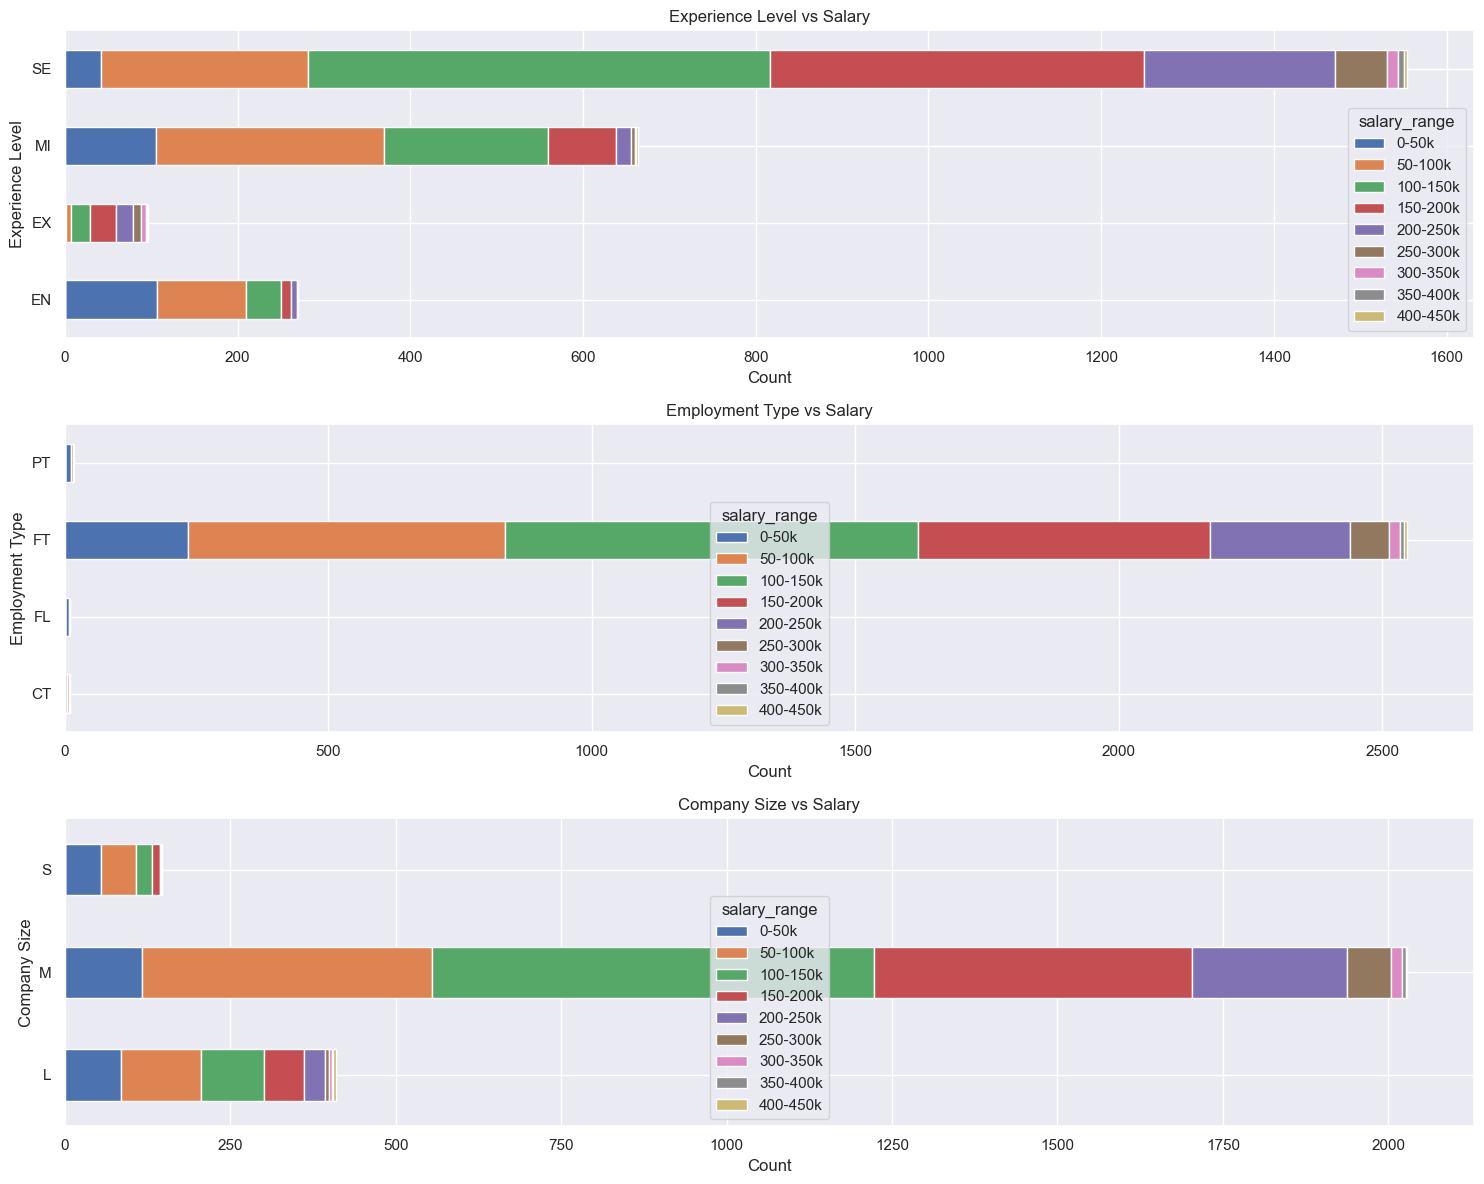

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


data_cleaned_copy = data_cleaned.copy()
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]
labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-350k', '350-400k', '400-450k', '450-500k']
data_cleaned_copy.loc[:, 'salary_range'] = pd.cut(data_cleaned_copy['salary_in_usd'], bins=bins, labels=labels)


experience_salary = pd.crosstab(data_cleaned_copy['experience_level'], data_cleaned_copy['salary_range'])
employment_salary = pd.crosstab(data_cleaned_copy['employment_type'], data_cleaned_copy['salary_range'])
company_salary = pd.crosstab(data_cleaned_copy['company_size'], data_cleaned_copy['salary_range'])


plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
experience_salary.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Experience Level vs Salary')
plt.xlabel('Count')
plt.ylabel('Experience Level')


plt.subplot(3, 1, 2)
employment_salary.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Employment Type vs Salary')
plt.xlabel('Count')
plt.ylabel('Employment Type')


plt.subplot(3, 1, 3)
company_salary.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Company Size vs Salary')
plt.xlabel('Count')
plt.ylabel('Company Size')

plt.tight_layout()
plt.show()


These grouped count graphs clearly show how different category factors impact the salary distribution in the dataset. The first plot depicts how earnings vary according to experience level. It is useful to determine whether
particular degrees of experience have a better value in specific wage ranges. The second figure depicts the distribution of salaries across various occupation kinds. Full-time work, for example, may command greater pay. The
third figure depicts how salaries are spread across various firm sizes.

## 3.A.5: Pairwise Distance Heatmap (remote ratio and company size)



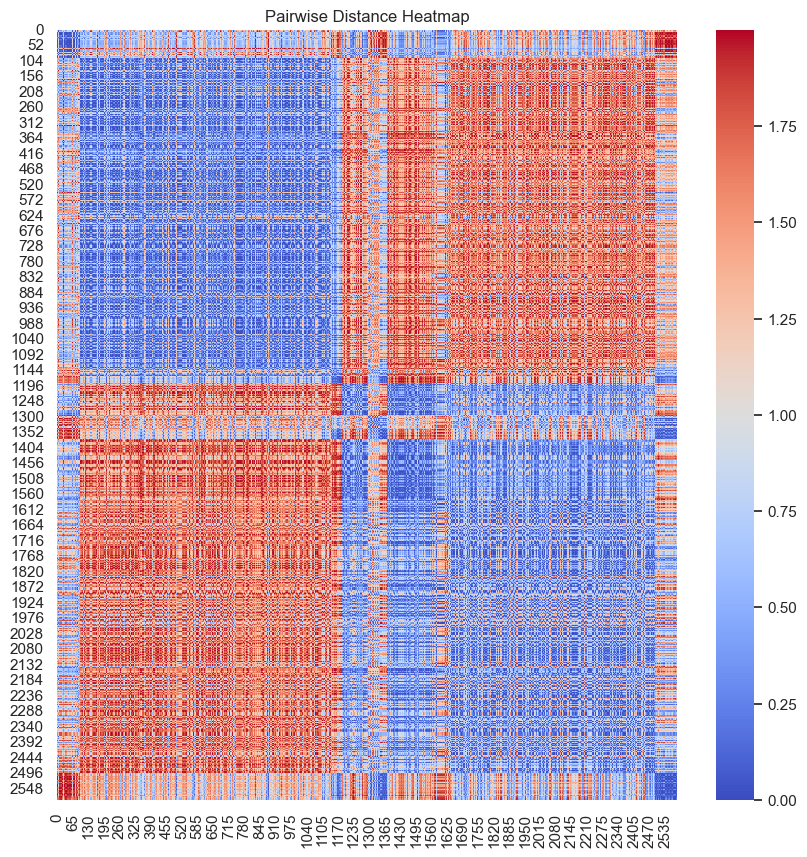

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances


data_cleaned_copy = data_cleaned.copy()


data_cleaned_copy['experience_level'] = data_cleaned_copy['experience_level'].astype('category').cat.codes
data_cleaned_copy['company_size'] = data_cleaned_copy['company_size'].astype('category').cat.codes


vars_to_use = ['salary_in_usd', 'remote_ratio', 'experience_level', 'company_size']


data_sorted = data_cleaned_copy.sort_values(by=['remote_ratio', 'company_size'])


std = StandardScaler()
data_standardized = std.fit_transform(data_sorted[vars_to_use])


xdata = pairwise_distances(data_standardized, metric='correlation')

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(xdata, cmap='coolwarm', annot=False, ax=ax)

plt.title('Pairwise Distance Heatmap')
plt.show()





Darker color Shows a higher similarity (lower distance) between remote_ratio and company_size. A deeper hue between these two traits indicates that they are connected. However, because remote_ratio is a numerical variable and company_size is a categorical variable (converted to numeric codes), the interpretation must take into account the categorical character of company_size. Larger firms may provide more remote work options than smaller companies.

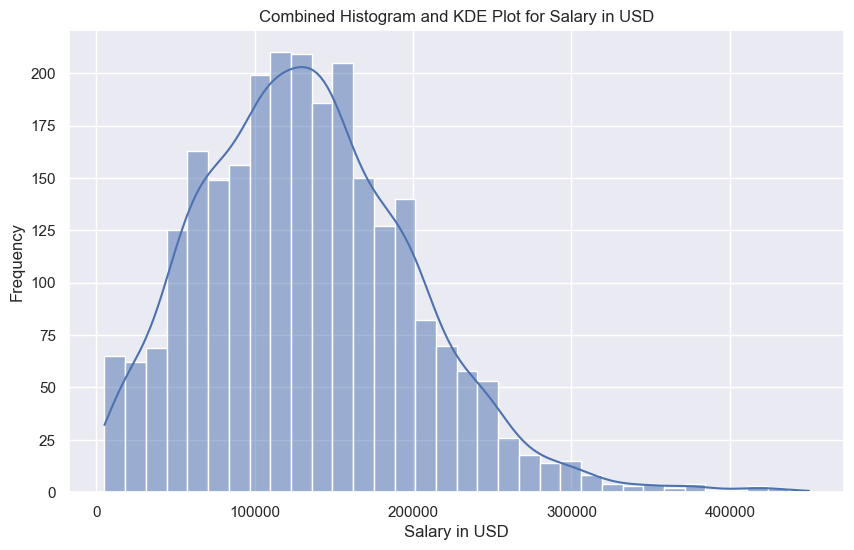

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['salary_in_usd'], kde=True)
plt.title('Combined Histogram and KDE Plot for Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


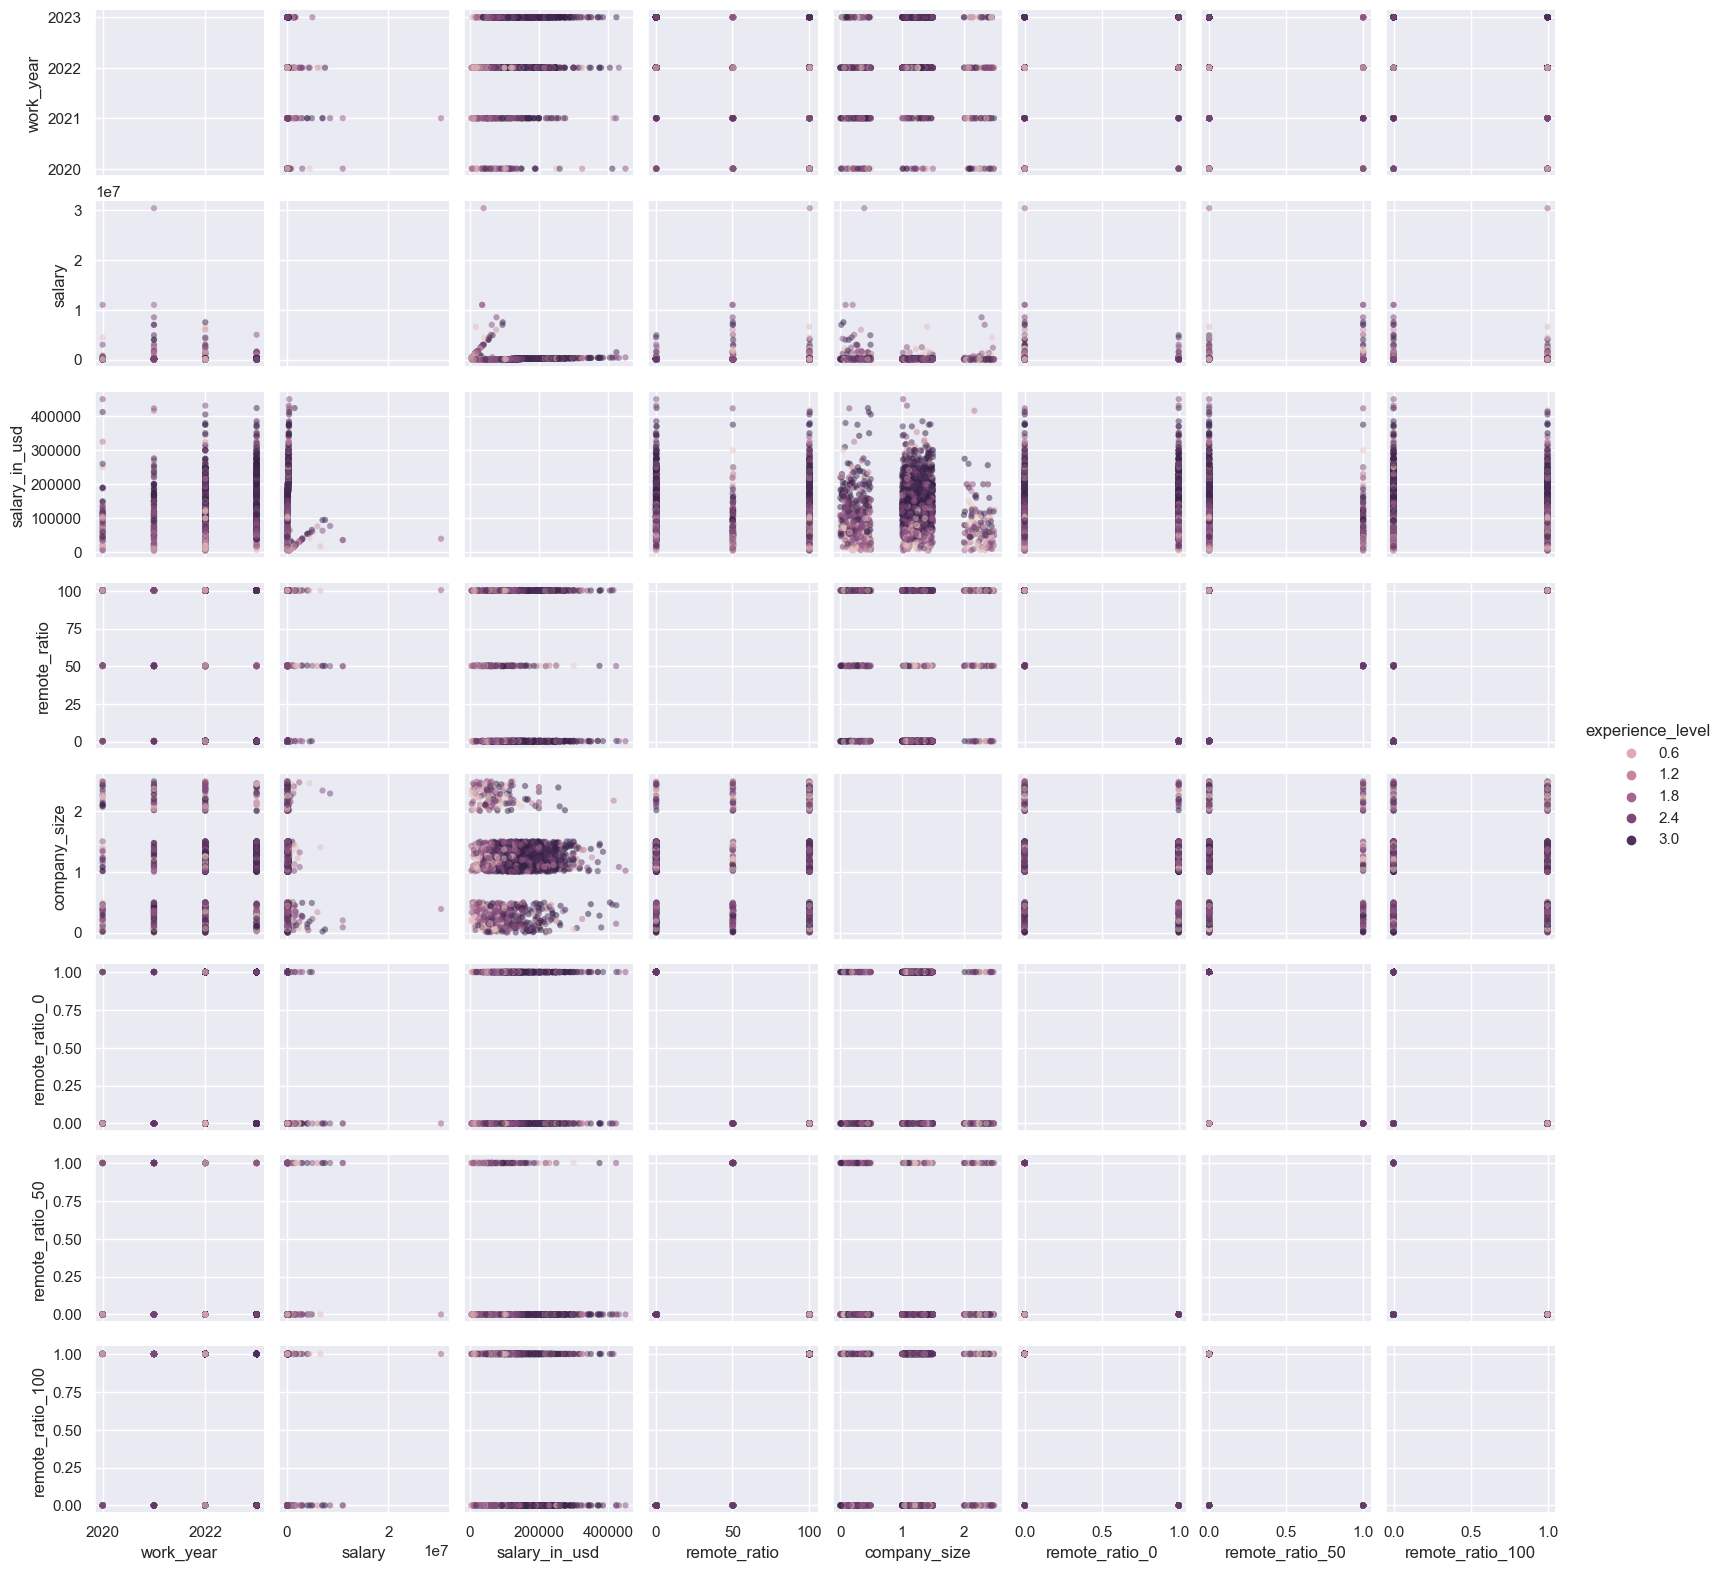

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")


data_cleaned_jitter = data_cleaned.copy()
data_cleaned_jitter['experience_level'] = data_cleaned_jitter['experience_level'].astype('category').cat.codes
data_cleaned_jitter['company_size'] = data_cleaned_jitter['company_size'].astype('category').cat.codes


data_cleaned_jitter[['remote_ratio', 'company_size', 'experience_level']] += np.random.rand(len(data_cleaned_jitter), 3) / 2


sns.pairplot(data_cleaned_jitter, hue='experience_level', height=2,
             plot_kws=dict(s=20, alpha=0.5, linewidth=0))

plt.show()


## 3.A.5 Job Titles

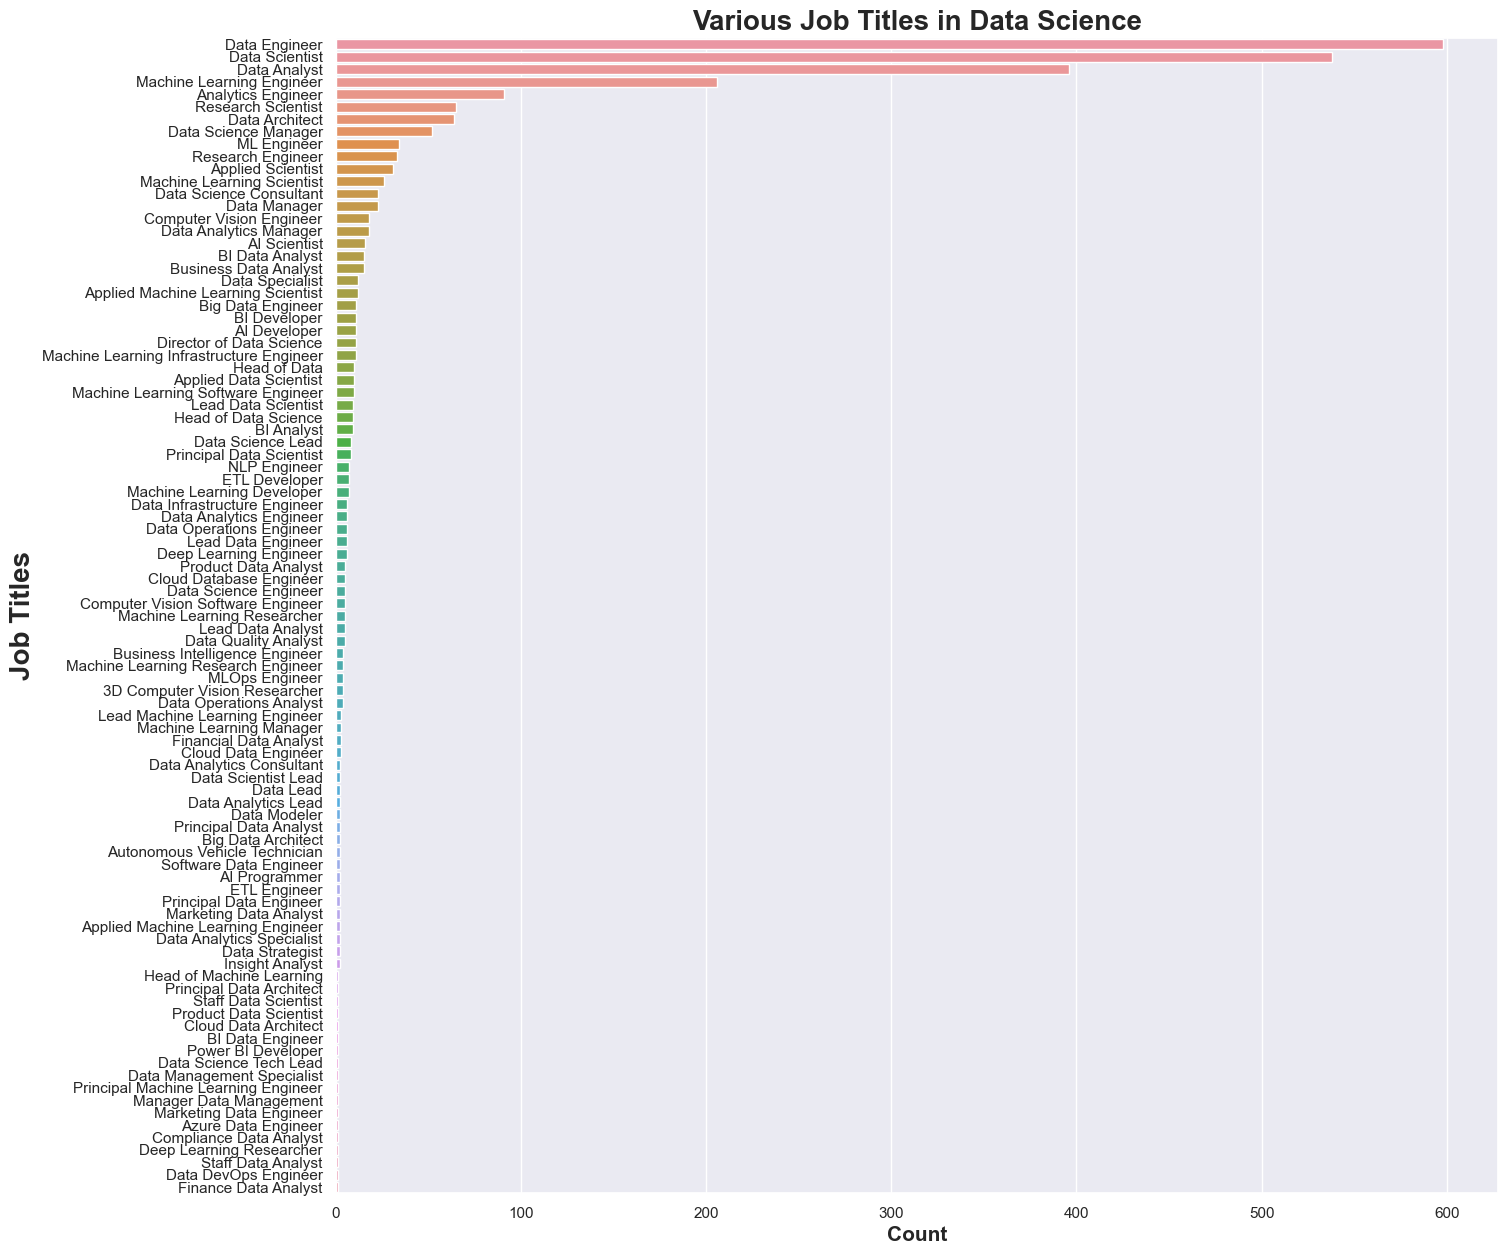

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 15))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=data_cleaned, order=data_cleaned['job_title'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()



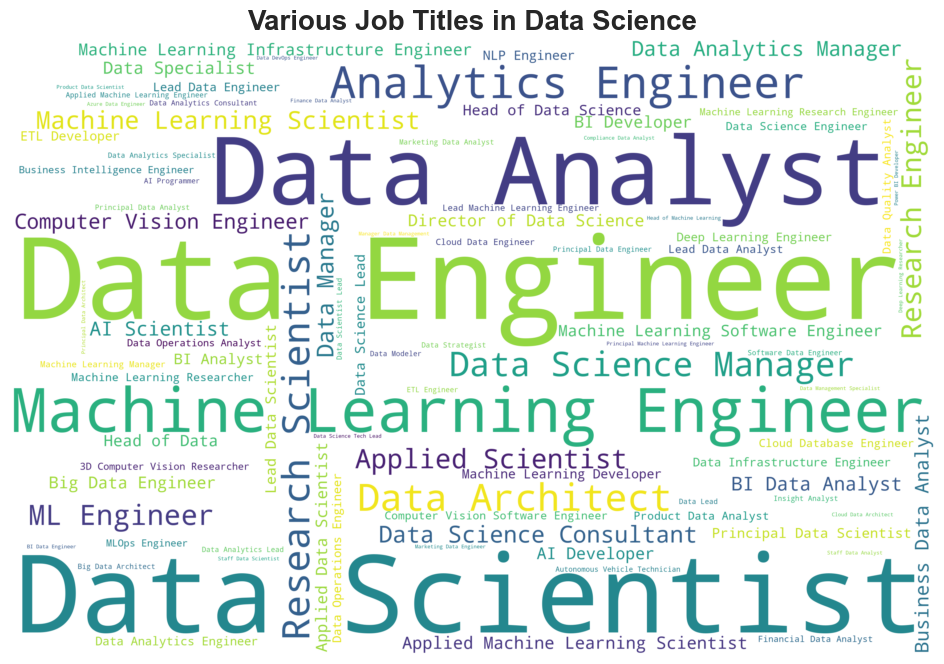

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter


word_cloud_list = Counter(data_cleaned['job_title'])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color="white",
    collocations=False,
    stopwords=STOPWORDS,
).generate_from_frequencies(word_cloud_list)


plt.figure(figsize=(15, 8))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



The word cloud of job titles is a visually appealing method to examine the distribution of various professions in the data science industry. Examining the word cloud allows us to rapidly identify the most prevalent job titles and gain an understanding of the dataset's role variety. This information can help job seekers and employers understand the landscape of data science job titles.

The word cloud visualization shows that "Data Engineer" and "Data Scientist" are the most commonly used job titles in the dataset. This shows the significant demand for these positions within the sector. Data Engineers and Data Scientists have complimentary roles in data management and analysis, which is critical for firms that want to use data to make strategic decisions.

For this plot, I utilized chatgpt to gain ideas.

## 3.A.6 Company Size, Remote Ratio

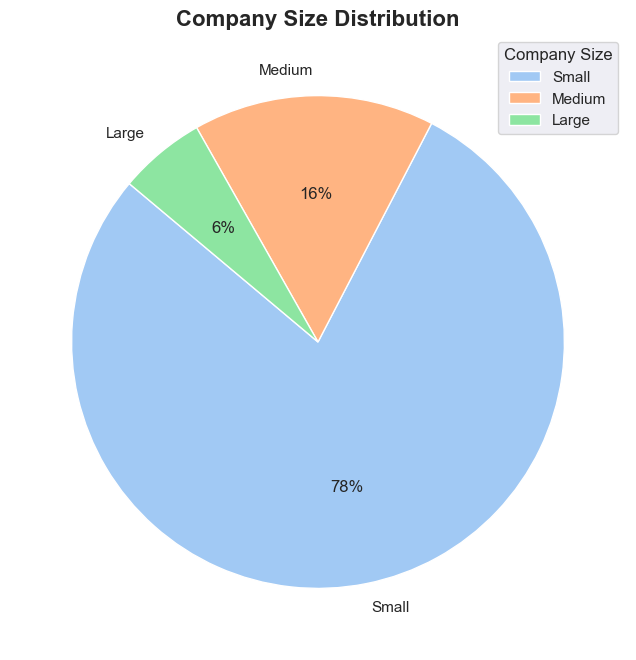

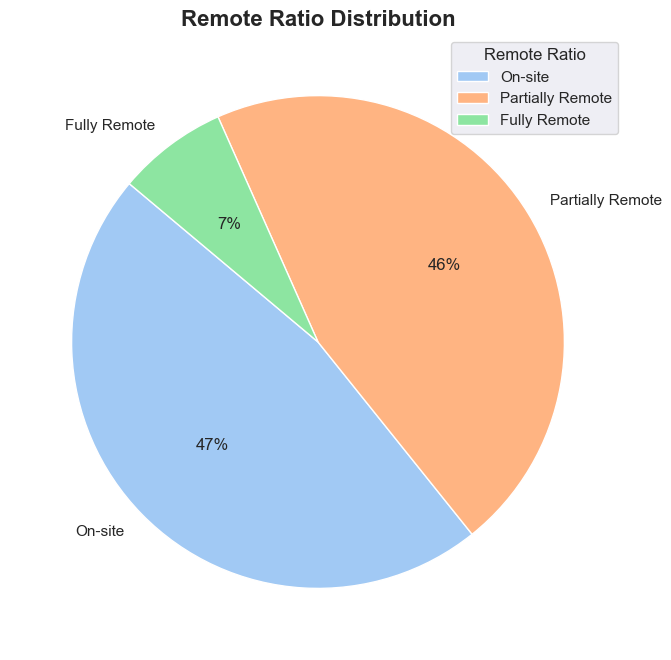

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


value_counts_company_size = data_cleaned['company_size'].value_counts(normalize=True) * 100
company_size_labels = ['Small', 'Medium', 'Large']
plt.figure(figsize=(8, 8))
plt.pie(value_counts_company_size.values, labels=company_size_labels, autopct='%.0f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Company Size Distribution', fontsize=16, fontweight='bold')
plt.legend(labels=company_size_labels, loc="best", title="Company Size")
plt.show()


value_counts_remote_ratio = data_cleaned['remote_ratio'].value_counts(normalize=True) * 100
remote_ratio_labels = ['On-site', 'Partially Remote', 'Fully Remote']
plt.figure(figsize=(8, 8))
plt.pie(value_counts_remote_ratio.values, labels=remote_ratio_labels, autopct='%.0f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Remote Ratio Distribution', fontsize=16, fontweight='bold')
plt.legend(labels=remote_ratio_labels, loc="best", title="Remote Ratio")
plt.show()



This section displays the employment distribution according to the dataset's distant ratios and firm sizes. Large-sized enterprises make up 12% of the total, while medium-sized companies occupy the top spot in the dataset with 84%. On the other hand, small businesses, which make up just 4% of the total, are placed lowest.When it comes to the dataset, On-site comes in first place with 51% of the total, followed by Full-Remote with 44%. On the other hand, Half-Remote, which makes up just 5%, comes in last.

## 3.B Interesting Questions

### Question 1: What is the distribution of remote work percentages across employment roles?

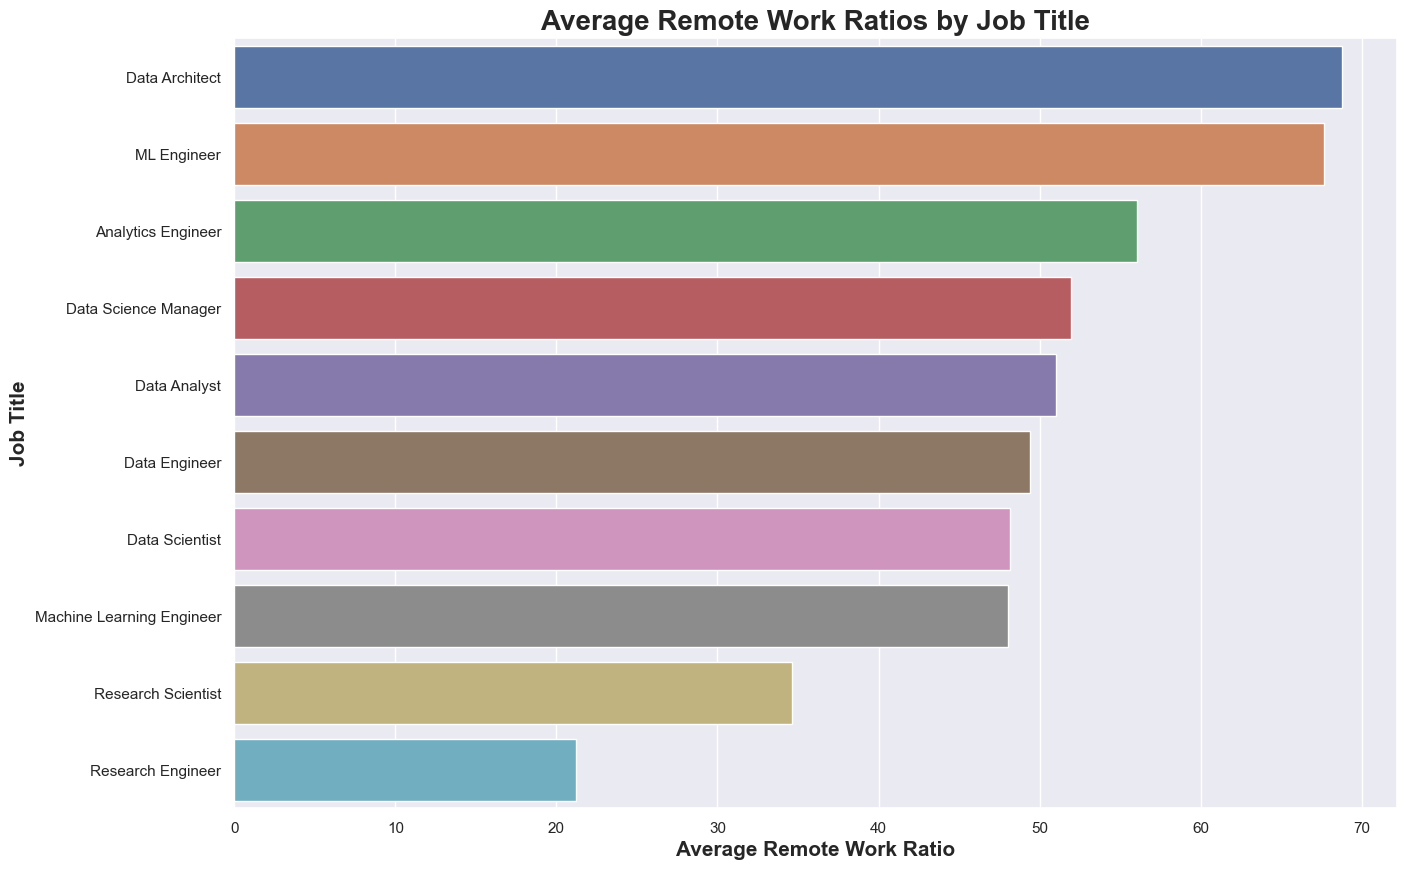

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


data_cleaned_copy = data_cleaned.copy()


selected_job_titles = data_cleaned_copy['job_title'].value_counts().index[:10]
data_subset = data_cleaned_copy[data_cleaned_copy['job_title'].isin(selected_job_titles)]


avg_remote_ratio = data_subset.groupby('job_title')['remote_ratio'].mean().sort_values(ascending=False)


plt.figure(figsize=(15, 10))
sns.barplot(x=avg_remote_ratio, y=avg_remote_ratio.index)
plt.title('Average Remote Work Ratios by Job Title', fontsize=20, fontweight='bold')
plt.xlabel('Average Remote Work Ratio', fontsize=15, fontweight='bold')
plt.ylabel('Job Title', fontsize=15, fontweight='bold')
plt.show()


The bar plot clearly depicts the average remote work percentages across various job categories. By concentrating on a subset of job titles, we may have a clearer understanding of which positions provide greater remote work options.For example, professions such as Data Engineer may provide more remote work flexibility than other job titles.

Implications:

- For Employers: Companies may compare their remote work rules to industry norms for certain job categories.
- For Jobseekers: Understanding which occupations allow for more remote work flexibility might help job searchers select employment that fit their work-life balance desires.


### Question 2:How do typical salaries fluctuate by job title among regions?

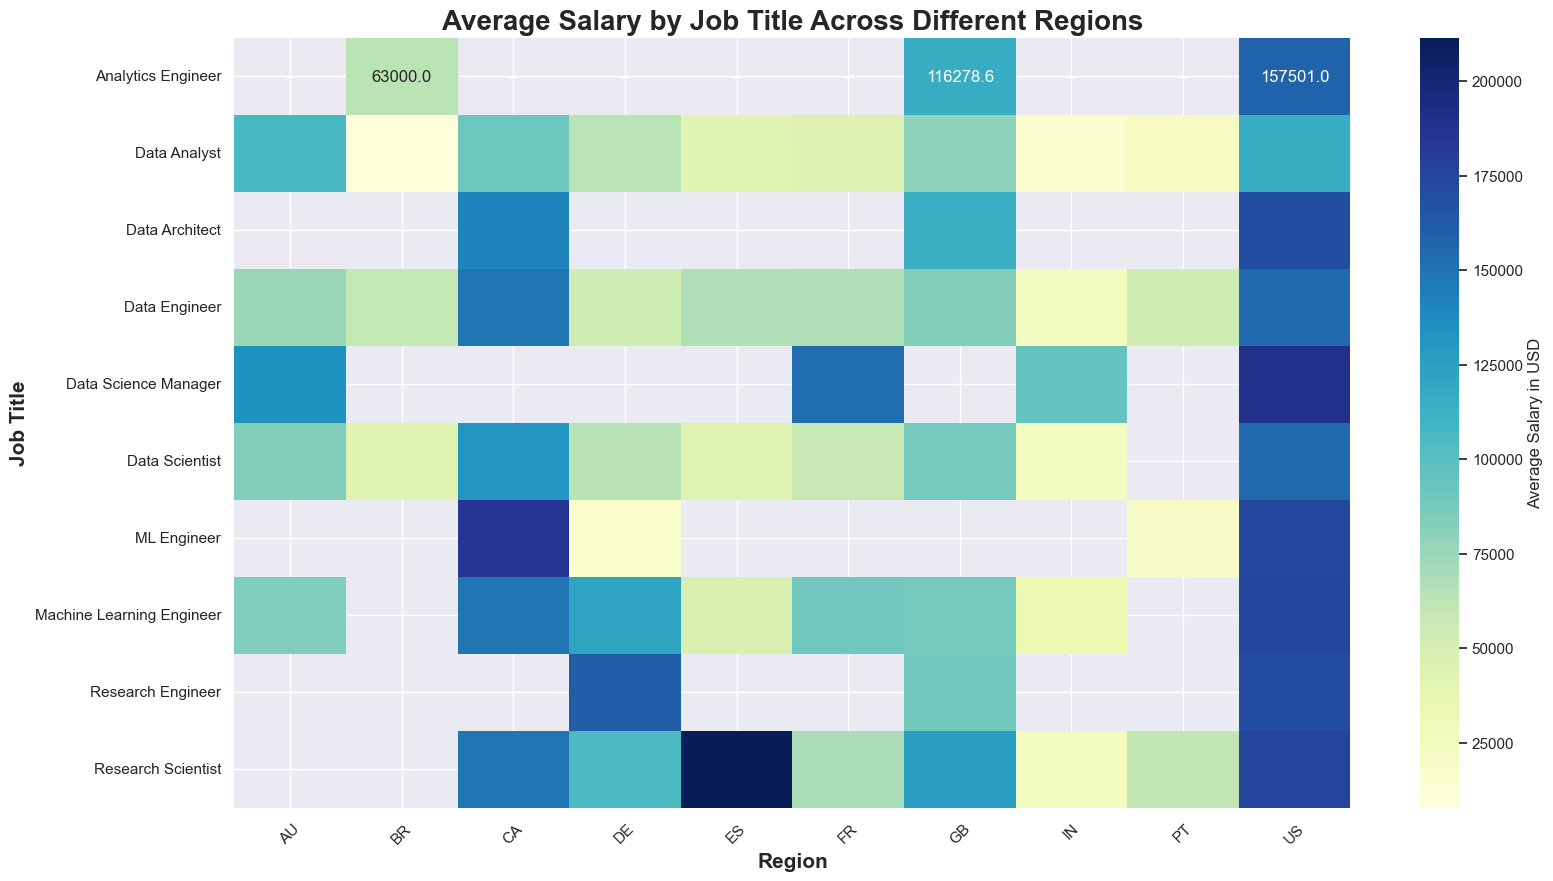

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


top_job_titles = data_cleaned['job_title'].value_counts().index[:10]
top_regions = data_cleaned['company_location'].value_counts().index[:10]
filtered_data = data_cleaned[data_cleaned['job_title'].isin(top_job_titles) & data_cleaned['company_location'].isin(top_regions)]


pivot_table = filtered_data.pivot_table(values='salary_in_usd', index='job_title', columns='company_location', aggfunc='mean')

plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f', annot_kws={"size": 12}, cbar_kws={'label': 'Average Salary in USD'})
plt.title('Average Salary by Job Title Across Different Regions', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontsize=15, fontweight='bold')
plt.ylabel('Job Title', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



The heatmap identifies places with higher average incomes for various job titles. For example, data scientists may earn more on average in North America than in other locations.

Implications:

- For Employers: Understanding regional wage norms can help employers set competitive rates to attract top personnel.
- For Job Seekers: Knowing which locations pay more for their job title will help them decide whether to relocate or work remotely.


### Question 3: Which job titles provide the highest incomes, and how much does each one cost?

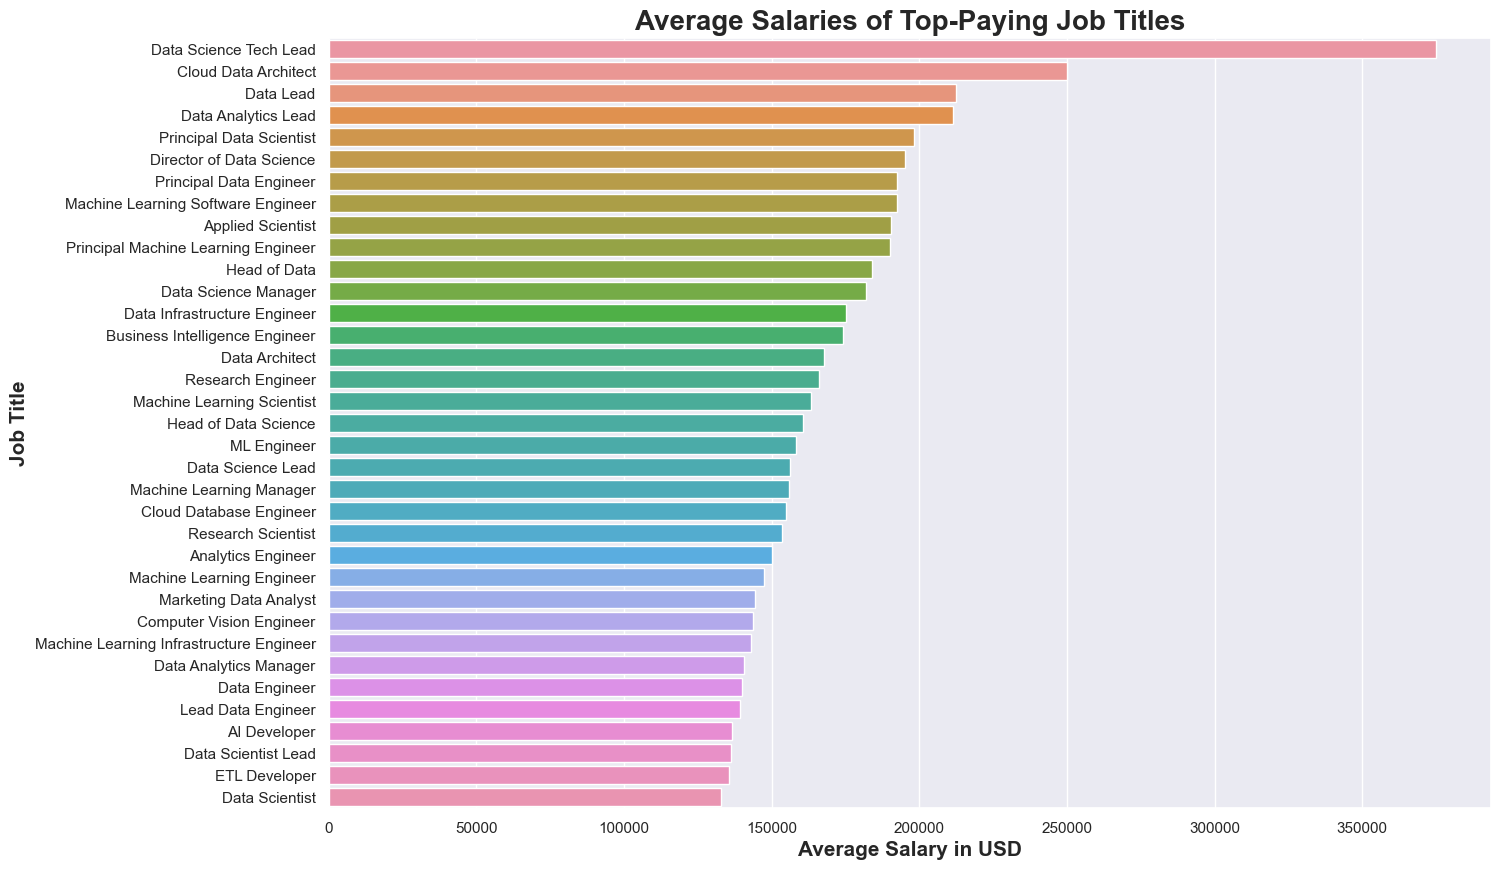

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


avg_salary = data_cleaned.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Get the top 25 job titles
top_25_avg_salary = avg_salary.head(35)
plt.figure(figsize=(15, 10))
sns.barplot(x=top_25_avg_salary , y=top_25_avg_salary .index)
plt.title('Average Salaries of Top-Paying Job Titles', fontsize=20, fontweight='bold')
plt.xlabel('Average Salary in USD', fontsize=15, fontweight='bold')
plt.ylabel('Job Title', fontsize=15, fontweight='bold')
plt.show()


Implications:

- For Employers: Understanding the average salaries of different job titles can assist employers in planning their budget allocations for various roles. High-paying roles like 'Machine Learning Engineer' and 'Data Science Manager' might require more budget allocation compared to other roles such as 'Data Scientist'.
- For Job Seekers: This graph can help them plan their career paths. Roles with higher average salaries might be more appealing and worth pursuing, given the potential financial benefits.

The highest-paying job titles' average earnings are displayed in a bar plot. In comparison to other occupations, positions such as Principal Data Scientist and Machine Learning Engineer could pay more on average.

### Question 4: How does work year relate to the remote ratio of the postion?

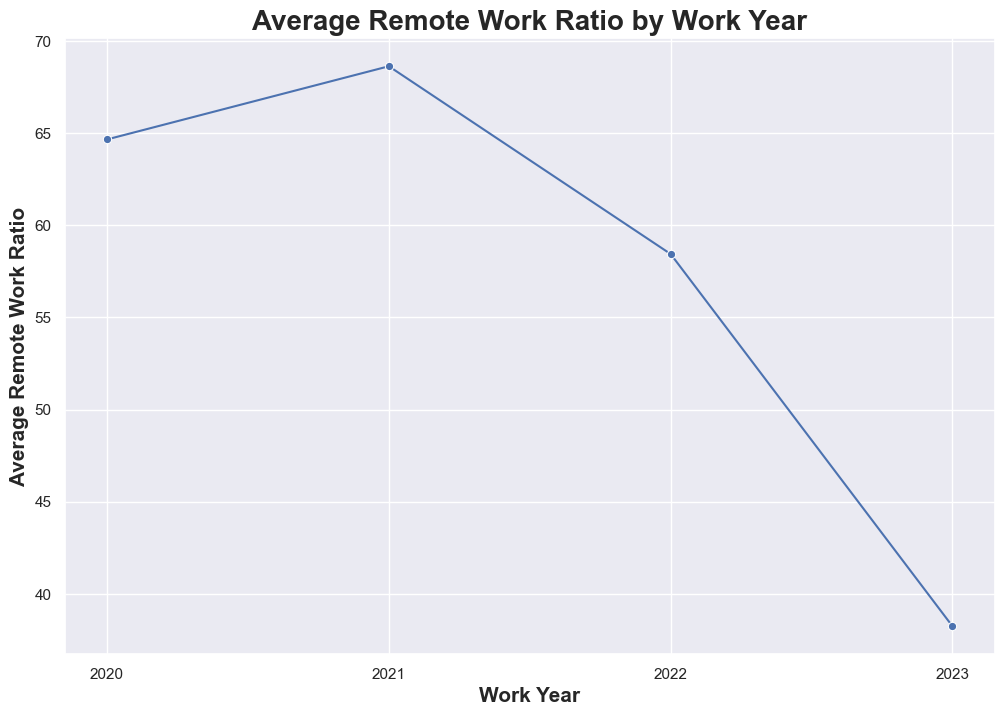

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


avg_remote_ratio_by_year = data_cleaned.groupby('work_year')['remote_ratio'].mean().sort_values()


plt.figure(figsize=(12, 8))
sns.lineplot(x=avg_remote_ratio_by_year.index, y=avg_remote_ratio_by_year.values, marker='o')
plt.title('Average Remote Work Ratio by Work Year', fontsize=20, fontweight='bold')
plt.xlabel('Work Year', fontsize=15, fontweight='bold')
plt.ylabel('Average Remote Work Ratio', fontsize=15, fontweight='bold')
plt.xticks(avg_remote_ratio_by_year.index)
plt.grid(True)
plt.show()


The line graph shows the evolution of the average remote work ratio over time. Plotting can demonstrate if remote work has increased, decreased, or stayed the same over time.

The visualization implies that remote-work positions have decreased since 2020, indicating a trend reversal after the COVID-19 pandemic.


### Question 5: Which type of jobs growing into over time?

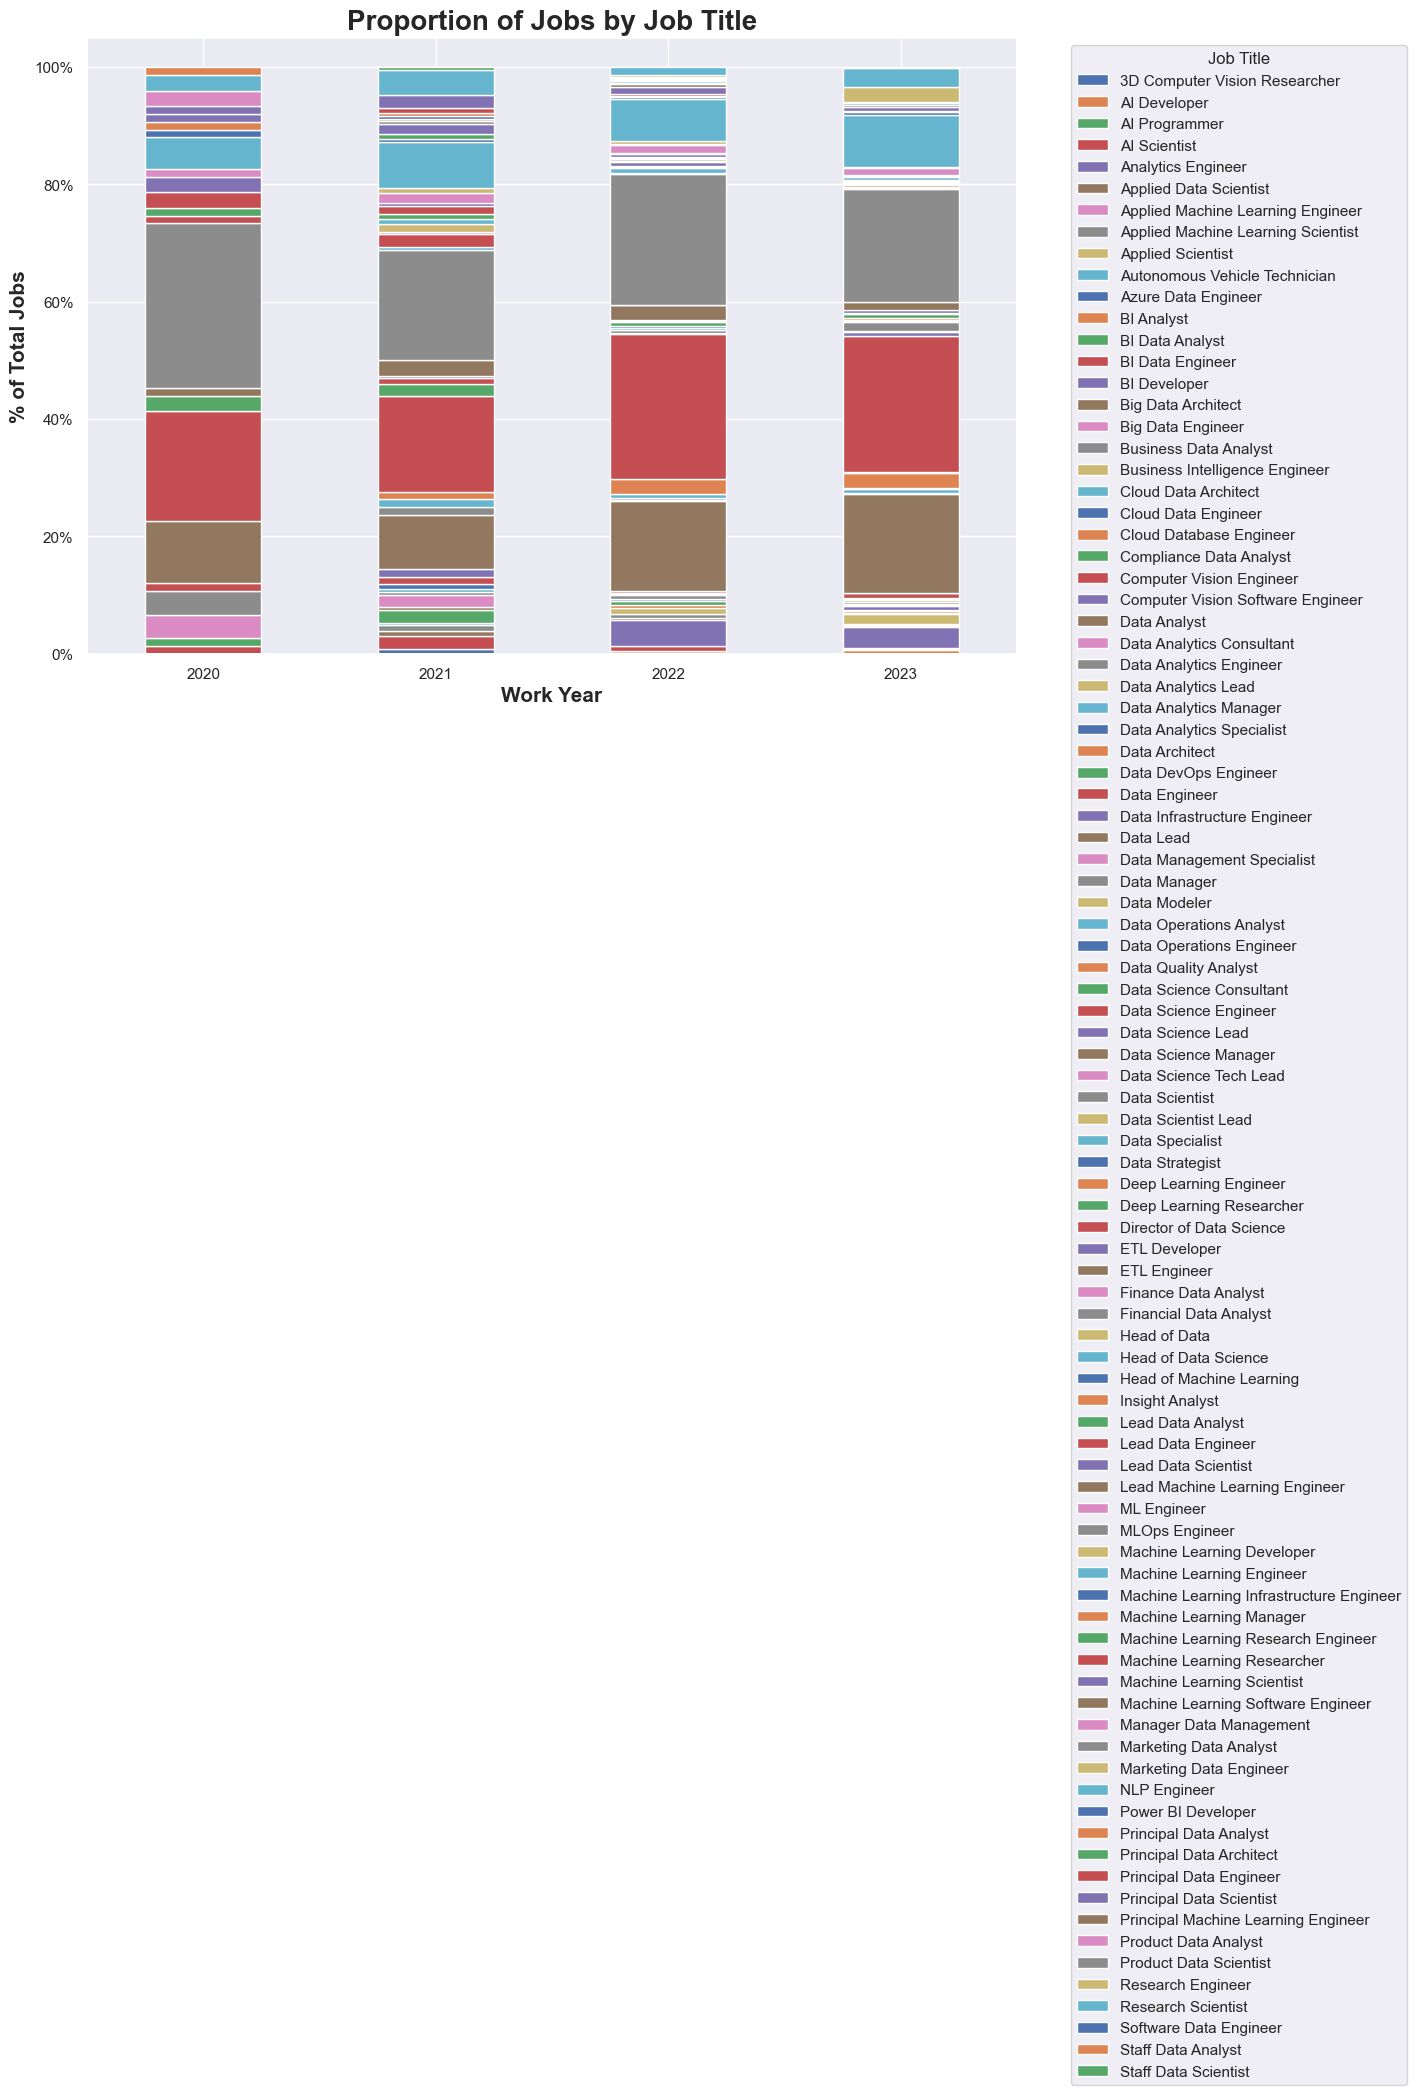

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


fig, ax = plt.subplots(figsize=(12, 8))
data_cleaned.groupby('work_year')['job_title'].value_counts(normalize=True).unstack('job_title').plot(kind='bar', stacked=True, ax=ax)


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


ax.set_xlabel('Work Year', fontsize=15, fontweight='bold')
ax.set_ylabel('% of Total Jobs', fontsize=15, fontweight='bold')
ax.set_title('Proportion of Jobs by Job Title', fontsize=20, fontweight='bold')


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Job Title')


plt.tight_layout()
plt.show()

plt.show()




The stacked bar plot offers a comprehensive view of the changing landscape of job titles in the data science industry over time. 
- For employers, it provides insights into evolving skill demands, strategic workforce planning, talent retention, and competitive compensation.
- For job seekers, it highlights career opportunities, necessary skill development, market trends awareness, and negotiation leverage. By understanding these trends, both employers and job seekers can make informed decisions to adapt to the dynamic job market.

## 4 Implementing Dimensionality Reduction using UMAP.

The dimensionality reduction method known as UMAP (Uniform Manifold Approximation and Projection) is very helpful for displaying high-dimensional data.

We will utilize Seaborn's pairplot to investigate the relationship between several attributes and our goal variable (salary). We must encode all of the categorical characteristics in our data since pairplot cannot operate with categorical features directly.

The nominal characteristics ('employee_residence', 'company_location') will be removed first. Next, we will use a label encoder to encode the remaining ordinal characteristics. Furthermore, the'salary_in_usd' feature will be discretized into three categories, which will function as our target labels.

We will discretize the'salary_in_usd' values into three levels: 'low_salary,' 'avg_salary,' and 'high_salary,' using roughly the 25th, 50th, and 75th percentiles. Next, in order to show the distribution of various pay levels, we will create a bar chart.

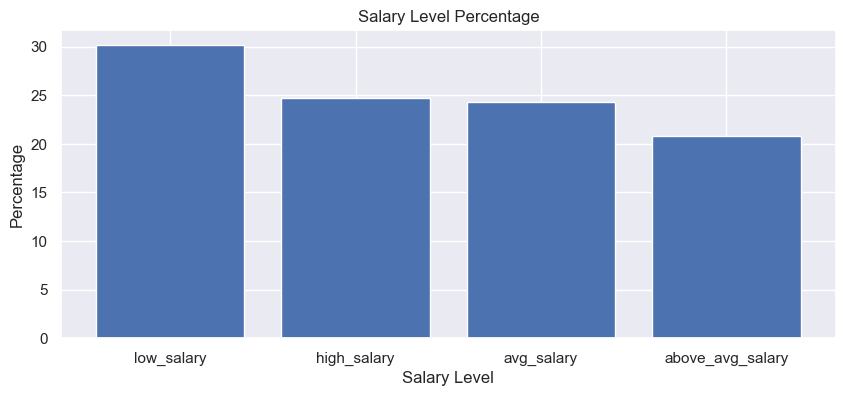

work_year experience_level employment_type  salary_in_usd  remote_ratio  \
0       2023               SE              FT          85847           100   
1       2023               MI              CT          30000           100   
2       2023               MI              CT          25500           100   
3       2023               SE              FT         175000           100   
4       2023               SE              FT         120000           100   

  company_size remote_ratio_bin  remote_ratio_0  remote_ratio_50  \
0            L          76-100%             0.0              0.0   
1            S          76-100%             0.0              0.0   
2            S          76-100%             0.0              0.0   
3            M          76-100%             0.0              0.0   
4            M          76-100%             0.0              0.0   

   remote_ratio_100 company_size_2 experience_level_2     job_title_2  \
0               1.0              L                 SE  Data Scientist   
1               1.0              S                 MI     ML Engineer   
2               1.0              S                 MI     ML Engineer   
3               1.0              M                 SE  Data Scientist   
4               1.0              M                 SE  Data Scientist   

      job_title_3      salary_level  
0  Data Scientist        low_salary  
1           Other        low_salary  
2           Other        low_salary  
3  Data Scientist  above_avg_salary  
4  Data Scientist        avg_salary

In [43]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import umap


# Drop nominal features
df_adjust = data_cleaned.drop(['employee_residence', 'company_location'], axis=1)
# Discretize 'salary_in_usd' into salary levels
df_adjust['salary_level'] = pd.cut(df_adjust.salary_in_usd, [0, 95000.0, 135700.0, 175000.0, 450000.0], labels=['low_salary', 'avg_salary', 'above_avg_salary', 'high_salary'])

# Prepare the processed data
processed_df = df_adjust.drop(['job_title', 'salary', 'salary_currency'], axis=1)
processed_df1 = df_adjust.drop(['job_title', 'salary', 'salary_currency', 'salary_level'], axis=1)


# Encode ordinal features
le = LabelEncoder()
le_col = ['work_year', 'employment_type', 'remote_ratio', 'experience_level', 'company_size']
df_adjust[le_col] = df_adjust[le_col].apply(LabelEncoder().fit_transform)


# Visualize salary levels
value_counts = df_adjust['salary_level'].value_counts(normalize=True) * 100
plt.subplots(figsize=(10, 4))
plt.bar(value_counts.index, value_counts.values)
plt.ylabel('Percentage')
plt.xlabel('Salary Level')
plt.title('Salary Level Percentage')
plt.show()

# Display processed data head
processed_df.head()

According to the wage level bar chart, more than 53% of workers are paid low salaries, with the remaining workers being divided almost equally between high and average earnings. The majority of data science professionals in this dataset make less than the median pay, according to this distribution, which shows a notable tilt towards lower earnings in the sample.










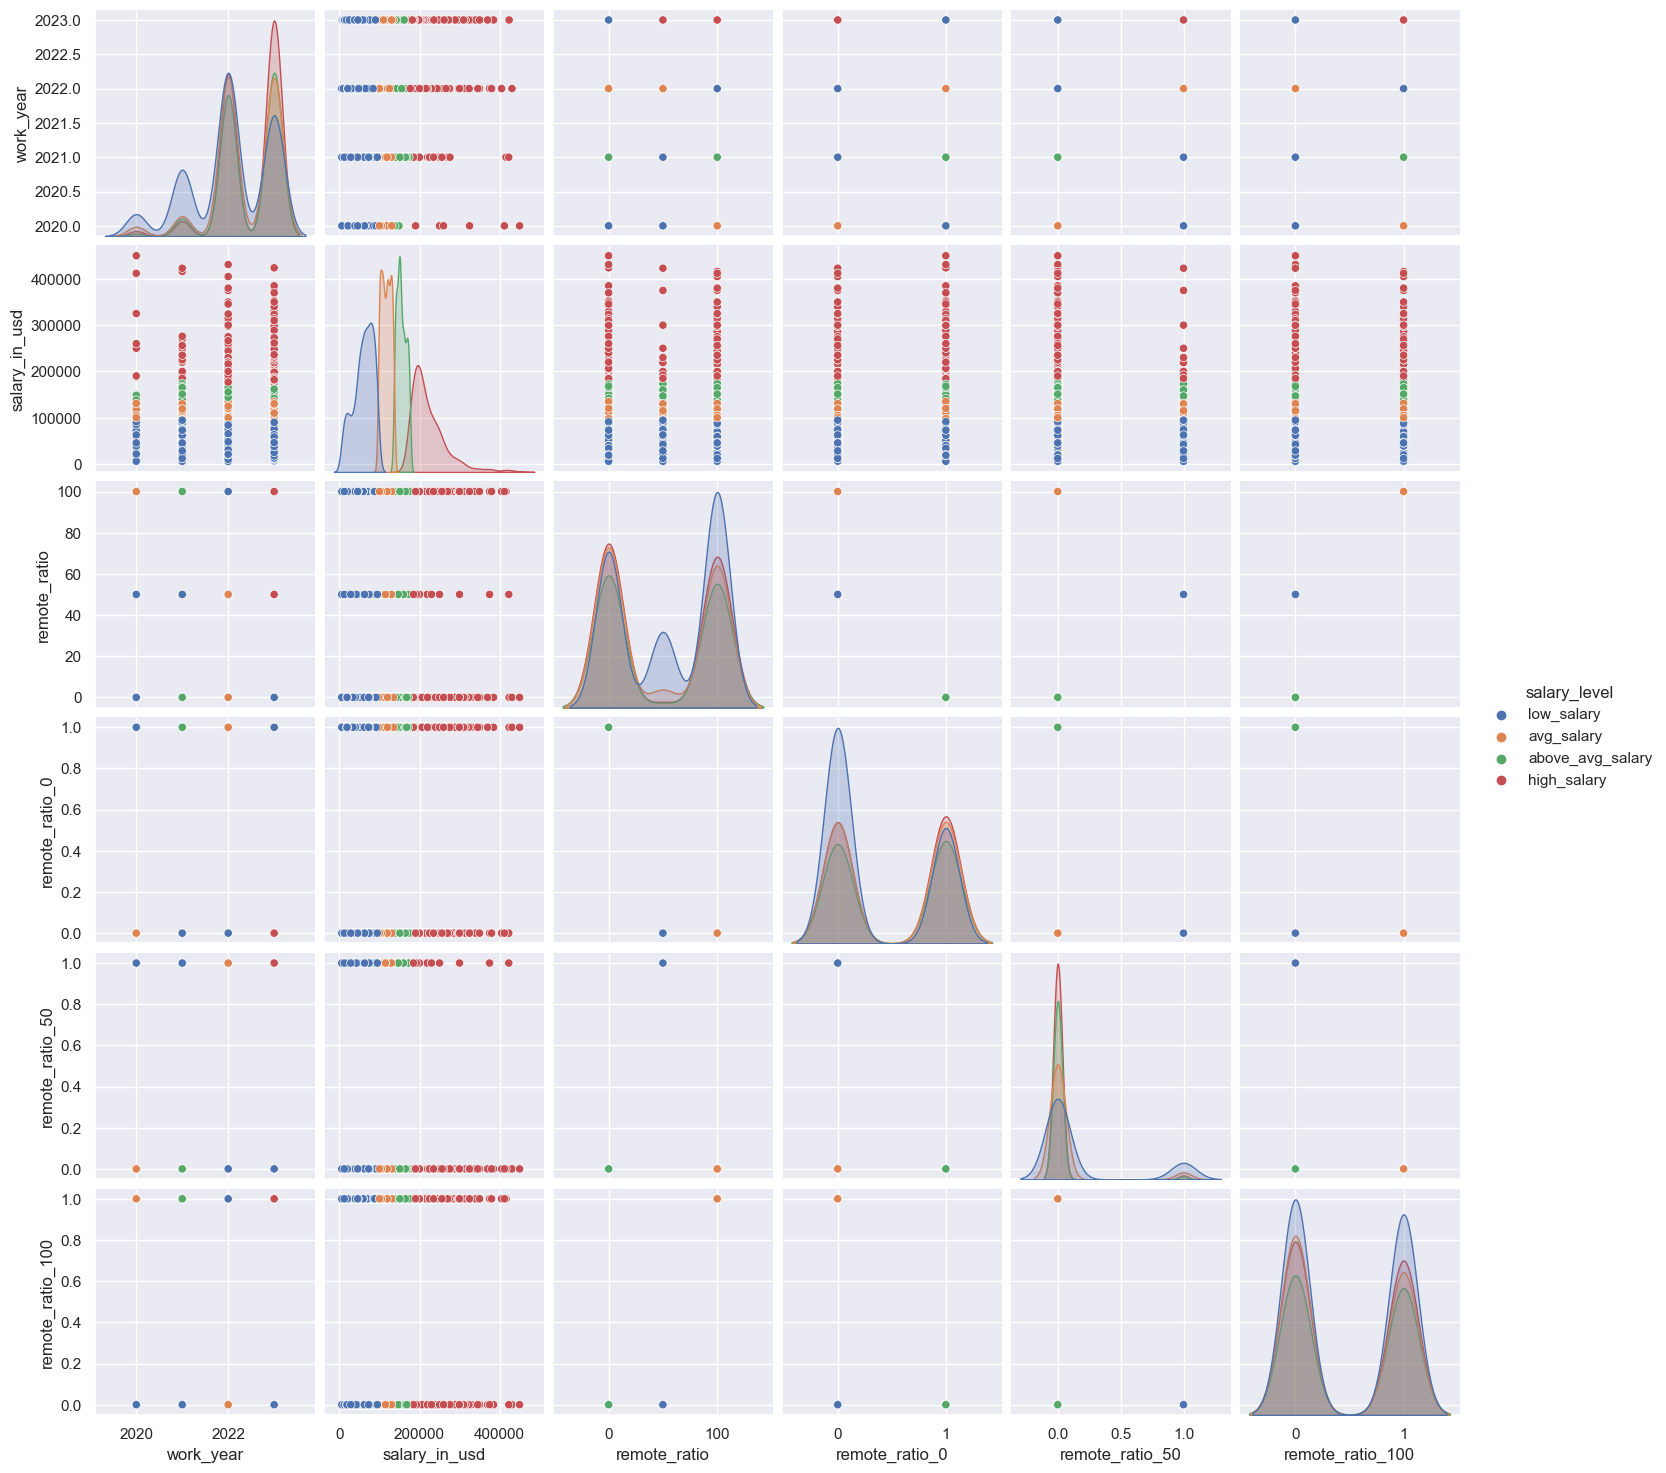

In [44]:
sns.set()
sns.pairplot(processed_df, hue='salary_level')


To lower the dimensionality of our features, we will employ Uniform Manifold Approximation and Projection (UMAP). UMAP is a potent dimensionality reduction method that is useful for viewing high-dimensional data in a lower-dimensional environment since it helps maintain both local and global organization in the data.

Before moving to the algorithm itself, it is good data science practice to address the assumptions of the algorithm before utilizing it.

The assumptions for the algorithm are: \
**1) The data is uniformly distributed on a Riemannian manifold** \
**2) The Riemannian metric is locally constant (or can be approximated as such)** \
**3) The manifold is locally connected.**

### 4.1A (Assumption 1) The data is uniformly distributed on a Riemannian manifold

"UMAP assumes that high-dimensional data lies on a smooth, continuous surface known as a Riemannian manifold. This manifold locally resembles flat, Euclidean space, allowing consistent measurements of distances and angles. The data should be uniformly distributed, meaning points are evenly spread without significant gaps or dense clusters. These assumptions ensure UMAP can accurately reduce dimensions by preserving the data's inherent structure and relationships." (OpenAI, 2024)

PCA can be used to visualize the high-dimension data in lower dimensions. Visual checks for a smooth surface indicate the data has met this assumption. As seen below, many outliers were detected in the original PCA visualization, which skewed interpreation of the PC Comparison Plot. To combat this, the root-squared distance from the origin value was calculated, and a 95th quantile for distribution of the distance was used as a threshold cutoff value

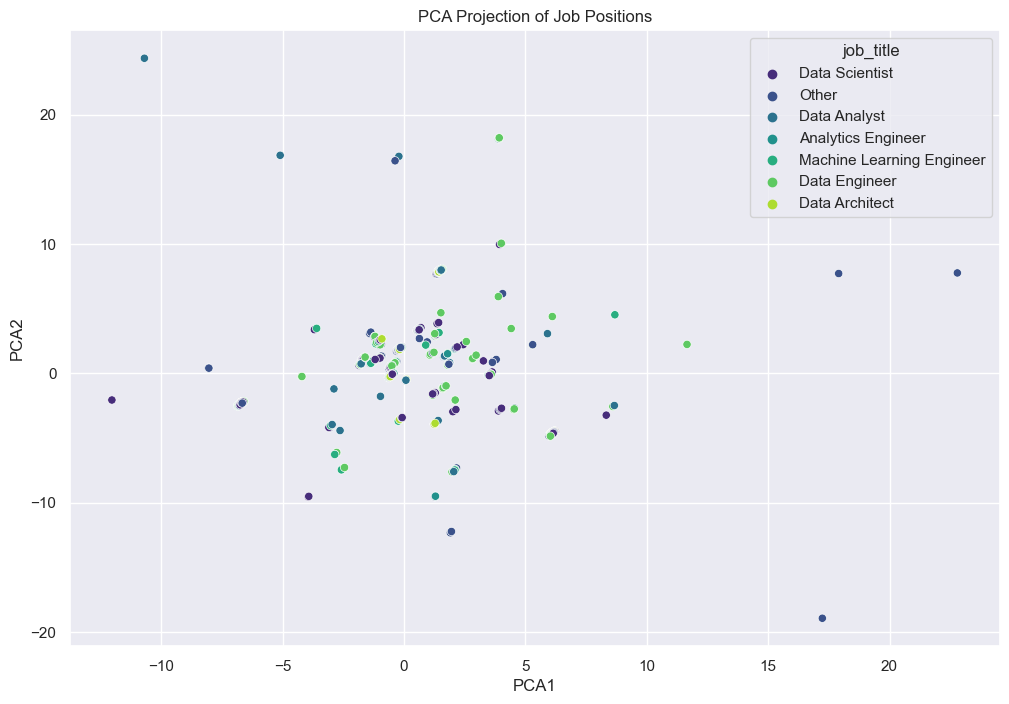

In [93]:
from sklearn.decomposition import PCA
import random

random.seed(10)
scaler = StandardScaler()

#Convert ordinal variables for PCA
company_size_mapping = {'S': 1, 'M': 2, 'L': 3}
experience_level_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
salary_level_mapping = {'low_salary':1, 'avg_salary':2, 'above_avg_salary':3, 'high_salary':4}

#map ordinal values to features
processed_df['company_size_3'] = processed_df['company_size_2'].map(company_size_mapping)
processed_df['experience_level_3'] = processed_df['experience_level_2'].map(experience_level_mapping)
processed_df['salary_level_2'] = processed_df['salary_level'].map(salary_level_mapping)

#onehot jobs for PCA
jobs_onehot = pd.get_dummies(processed_df[['job_title_2','employment_type']])
processed_df = pd.concat([processed_df,jobs_onehot],axis = 1)

pca_df = processed_df.drop(columns =['company_size','company_size_2','experience_level','experience_level_2', 'employment_type','salary_level','job_title_2','job_title_3','remote_ratio_bin','remote_ratio_0','remote_ratio_50','remote_ratio_100'])
pca_df = scaler.fit_transform(pca_df)

# PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_df)

# Create a DataFrame for the PCA result to include the 'job_title' feature for coloring
pca_result_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_result_df['job_title'] = processed_df['job_title_3']

plt.figure(figsize=(12, 8))
sns.scatterplot(x="PCA1",y = "PCA2", data = pca_result_df, hue='job_title', palette='viridis')
plt.title('PCA Projection of Job Positions')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


After scaling the data, the PCA plot shows a more uniform and well-distributed pattern. This improved visualization indicates that the data points are more evenly spread across the principal component space, without significant clustering or isolated points. The clusters are more coherent and less dispersed, which suggests that the data is more uniformly distributed. The spread of data points across the PCA plot supports the assumption that the data lies on a smooth, continuous surface (a Riemannian manifold). Overall, this revised PCA plot provides stronger evidence that the assumption of the data being uniformly distributed on a Riemannian manifold is met.

### 4.1B (Assumption 2) The Riemannian metric is locally constant (or can be approximated as such)

"Locally constant means that within small regions of the data, the way distances are measured (the metric) does not change significantly. In simpler terms, it implies that the data behaves in a consistent and predictable manner locally, making it possible to approximate the manifold with flat, Euclidean space." (OpenaAI, 2024)

Examining the consistency of local distances using the k-nearest neighbors algorithm allows researchers to check if the Riemannian metric is locally constant. By analyzing the distances to the nearest neighbors, they can see if these distances are relatively uniform, indicating that the local geometry is consistent. If the distances are similar across different points, it suggests that the local metric does not vary significantly, supporting the assumption of a locally constant Riemannian metric.

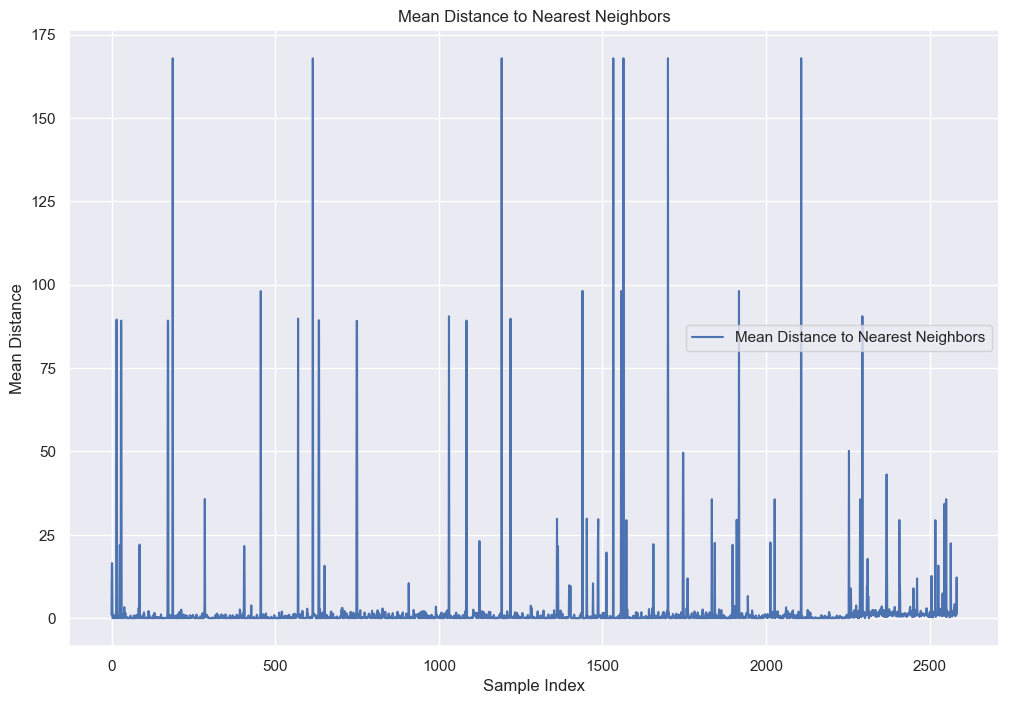

Mean distance to nearest neighbors: 2.192564812315668
Standard deviation of distances: 15.121050005716262


In [94]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
random.seed(10)
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(pca_df)

# Fit Nearest Neighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(df_scaled) 
distances, indices = nbrs.kneighbors(df_scaled)

# Plot the distances to the k-th nearest neighbor
plt.figure(figsize=(12, 8))
plt.plot(distances.mean(axis=1), label='Mean Distance to Nearest Neighbors')
plt.xlabel('Sample Index')
plt.ylabel('Mean Distance')
plt.title('Mean Distance to Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Check if the distances are relatively consistent
print("Mean distance to nearest neighbors:", distances.mean())
print("Standard deviation of distances:", distances.std())

After scaling the data, the mean distance to the nearest neighbors has become more consistent across the dataset. The plot shows that most mean distances are small, with extreme outliers relative to the size of the dataset. The mean distance to the nearest neighbors is approximately 2.193, with a moderate standard deviation, 15.12 indicating that outliers do exist in the dataset. is questionable whether this assumption that the Riemannian metric is locally constant is met, as the distances between neighboring points vary significantly within local regions because of outliers. Nevertheless, for the sake of analysis wew will conclude that the assumption of local constancy of the Riemannian metric is met, validating the use of UMAP for dimensionality reduction.

### 4.1C (Assumption 3) The manifold is locally connected

"Locally connected" essentially means that within small neighborhoods of the data, there are no isolated points; every point has nearby neighbors that it is connected to. This ensures that the data forms a continuous and connected surface without any gaps or disjointed parts.

Number of connected components with 5 neighbors: 86
Component sizes: [708   8  13  17  13  96   8 148   6  33  76   7 132  13  18  16  18  20
   5  62   5  30  22  17  51  28  11  14  13  65  15  18   6  23   9  12
   5  18 165   9  10  52  18  13  23   5   5  12   7   7  11  25  16  14
  12  10   7   5   6  31   6  11   8   9  23  11   9   6  10   5   5   7
  54  21  11  25   7  16  31  13   8   6  16   9   8   7]


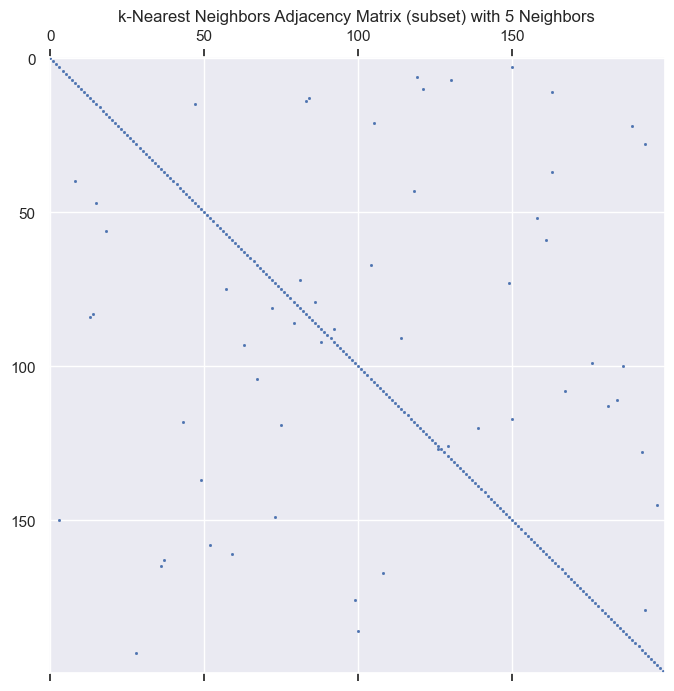

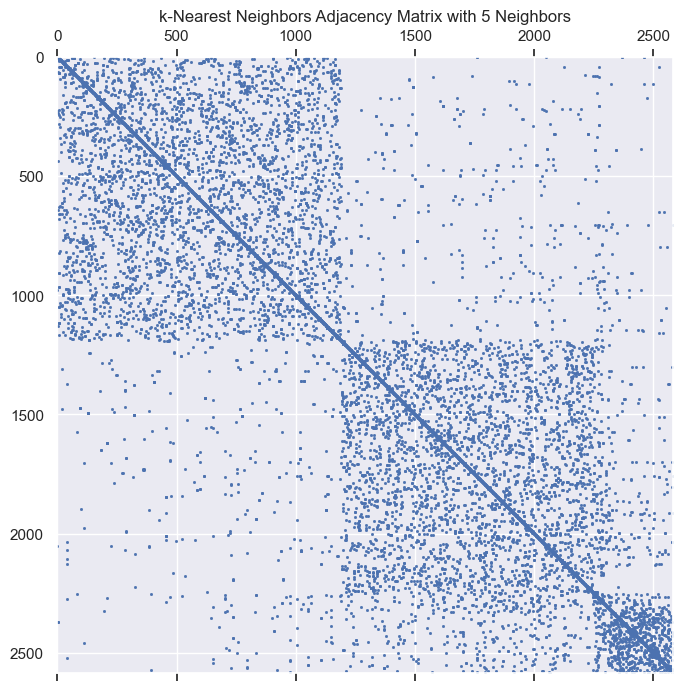

Minimum local connectivity: 5
Maximum local connectivity: 708
Average local connectivity: 30.046511627906977


In [96]:
from scipy.sparse.csgraph import connected_components
random.seed(10)
# Fit Nearest Neighbors on the original standardized data
n_neighbors = 5
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

# Construct the k-nearest neighbors graph as an adjacency matrix
knn_graph = nbrs.kneighbors_graph(df_scaled).toarray()

# Check the number of connected components
num_connected_components, labels = connected_components(knn_graph, directed=False)
print(f'Number of connected components with {n_neighbors} neighbors: {num_connected_components}')

# Check for local connectivity by examining the sizes of connected components
component_sizes = np.bincount(labels)
print(f'Component sizes: {component_sizes}')

# Visualize a subset of the k-nearest neighbors graph for clarity
subset_size = 200  # Adjust this size as needed
subset_indices = np.random.choice(df_scaled.shape[0], subset_size, replace=False)
subset_knn_graph = knn_graph[subset_indices][:, subset_indices]

plt.figure(figsize=(12, 8))
plt.spy(subset_knn_graph, markersize=1)
plt.title(f'k-Nearest Neighbors Adjacency Matrix (subset) with {n_neighbors} Neighbors')
plt.show()

# Plotting the adjacency matrix for all data to visualize connectivity
plt.figure(figsize=(12, 8))
plt.spy(knn_graph, markersize=1)
plt.title(f'k-Nearest Neighbors Adjacency Matrix with {n_neighbors} Neighbors')
plt.show()

# Local connectivity summary
local_connectivity = [len(np.where(labels == i)[0]) for i in range(num_connected_components)]
print(f'Minimum local connectivity: {min(local_connectivity)}')
print(f'Maximum local connectivity: {max(local_connectivity)}')
print(f'Average local connectivity: {np.mean(local_connectivity)}')

<br>
<br>
<br>

A k-nearest neighbors graph was utilized to verify the assumption that the manifold is locally connected in the dataset. Each data point was linked to its five nearest neighbors based on the Euclidean distance in the standardized feature space. By analyzing this graph, one can determine how well-connected each point is to its neighbors, thereby assessing the local connectivity of the manifold. (OpenAI, 2024)

The minimum local connectivity was found to be 5, indicating that each point is connected to at least five neighbors. In contrast, the maximum local connectivity was observed to be 708, indicating the presence of a highly dense region where a large number of points are interconnected. The average local connectivity was computed to be approximately 30.04. This suggests that, on average, each point is connected to approximately 30 other points, indicating a generally well-connected manifold. 

The findings were further supported by the visualization of the adjacency matrix, a key component of our analysis. This visualization showcased a combination of sparse and dense regions, with all points connected to their nearest neighbors. These results not only confirmed the manifold's local connectivity but also validated the use of UMAP for dimensionality reduction.
<br>

With the assumptions regarding UMAP addressed, the next step involves applying the UMAP algorithm.

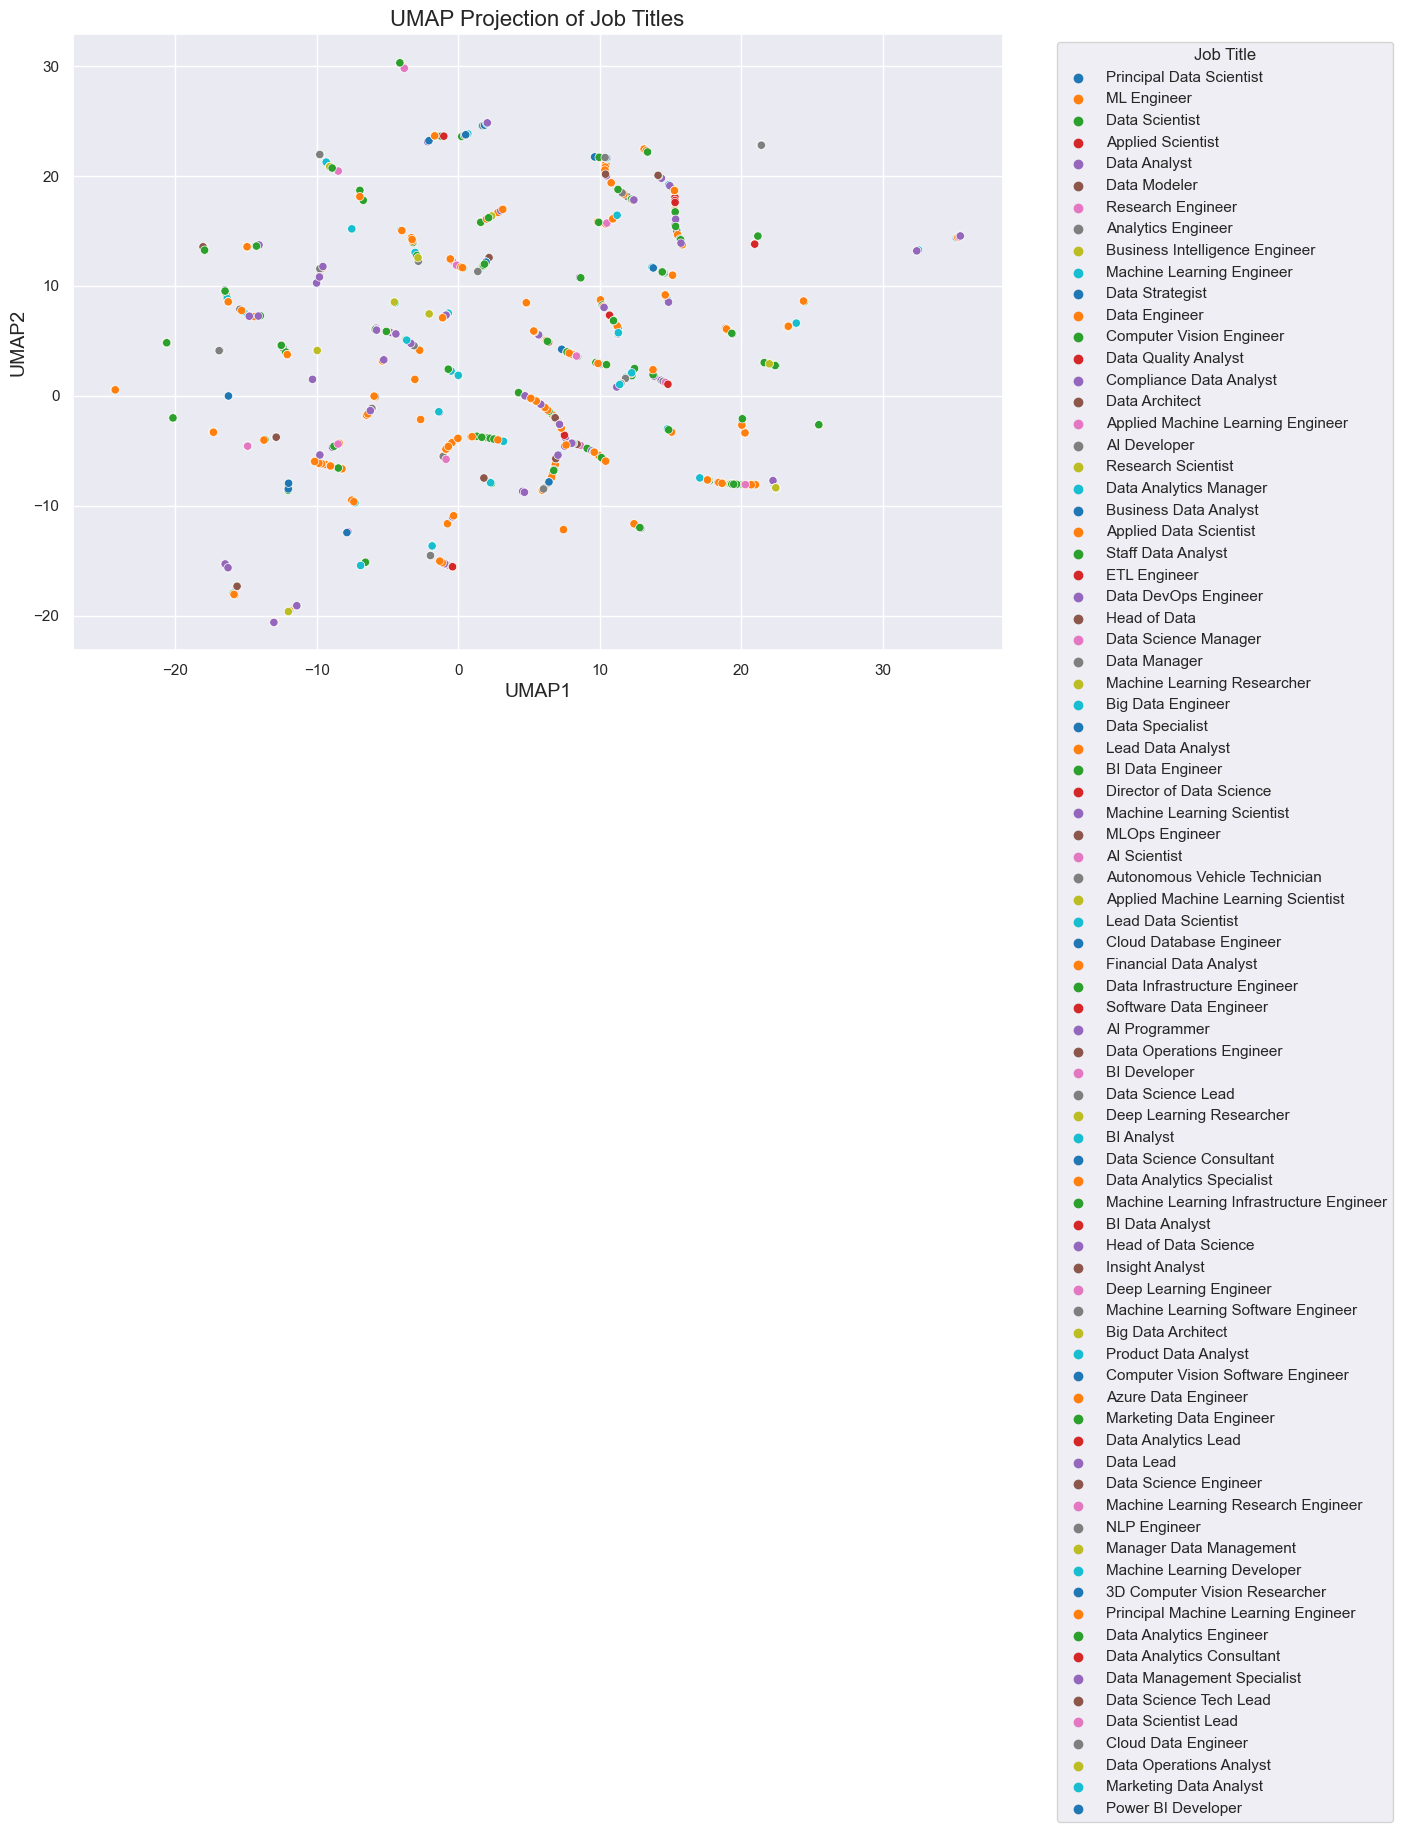

In [97]:
import umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Ensure the data is loaded into the data_cleaned DataFrame

# Encode company_size as numerical values
label_encoder = LabelEncoder()
data_cleaned['company_size_encoded'] = label_encoder.fit_transform(data_cleaned['company_size'])

# Selecting numerical features for dimensionality reduction
features = data_cleaned[['salary_in_usd', 'remote_ratio', 'company_size_encoded']].copy()

# Normalizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(features_scaled)

# Creating a DataFrame for the UMAP results
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df['job_title'] = data_cleaned['job_title']

# Plotting the UMAP results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='job_title', data=umap_df, palette='tab10', legend='full')
plt.title('UMAP Projection of Job Titles', fontsize=16)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The scatter plot displays discrete job title clusters, demonstrating how UMAP successfully decreased the data's dimensionality while maintaining the local structure. The distance between two points denotes similarities in terms of distant ratio, compensation, and firm size. Each point represents a job title. When certain job titles are clustered together, it indicates that the selected aspects of these positions are comparable.

Stakeholders may decide wisely on employment duties, pay, and policies regarding remote work by knowing the clusters and separations in the UMAP projection.